# **Análisis de Incendios Forestales en México**

#### **Ciclo de vida del proyecto**

*   Comprender el Problema a resolver
*   Recopilar datos
*   Comprobaciones de datos
*   Análisis Exploratorio de Datos
*   Preprocesamiento de Datos
*   Entrenamiento de modelos
*   Elección del mejor modelo

### **1.- Problema a resolver**

Este proyecto busca entender cómo el impacto de un incendio forestal en México es afectado por variables como el Tipo del incendio, Ubicación, Duración, Tiempos de atención, Superficie y Vegetación.

### **2.- Recopilar datos**
* Los datos son recuperados de https://datos.gob.mx/busca/dataset/incendios-forestales/resource/1773ca9e-456e-4cfb-9694-1c3f672d12a0

* La fuente de nombre **Cierre estadístico de Incendios Forestales 2022** consiste de una base de datos en formato Excel de los terrenos forestales que presentaron incendios en la república mexicana durante los años 2015-2022.




#### **2.1.- Importación de librerías y de datos**

**Importamos librerías**

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importamos datos**

In [62]:
incendios = pd.read_csv('/BD_IncendiosSNIF_2015-2022.csv', encoding='latin1')

**Mostramos los primeros 5 registros**

In [63]:
incendios.head()

,Año,Clave del incendio,latitud_grados,latitud_minutos,latitud_segundos,Latitud,longitud_grados,longitud_minutos,longitud_segundos,Longitud,...,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Tamaño,Detección,Llegada,Duración
0,2016,16-02-0127,32,28,27.54,32.474317,117,7,1.95,-117.117208,...,0.0,0.0,2.0,1.5,0.0,3.5,0 a 5 Hectáreas,0.013888889,0.010416667,0.395833333
1,2017,17-02-0132,32,27,46.60,32.462944,117,6,10.32,-117.102867,...,0.0,0.0,0.0,1.0,0.0,1.0,0 a 5 Hectáreas,0.003472222,0.009027778,0.111111111
2,2017,17-02-0133,32,26,43.44,32.445400,117,6,8.06,-117.102239,...,0.0,0.0,0.0,0.5,0.0,0.5,0 a 5 Hectáreas,0.006944444,0.013194444,0.131944444
3,2017,17-02-0138,32,28,47.70,32.479917,117,5,8.81,-117.085781,...,0.0,0.0,5.0,0.0,0.0,5.0,0 a 5 Hectáreas,0.002083333,0.011805556,0.076388889
4,2019,19-02-0083,32,27,7.92,32.452200,117,4,10.34,-117.069539,...,0.0,0.0,328.0,252.6,0.0,580.6,Mayor a 100 Hectáreas,0.006944444,0.020833333,2.21875


**Forma del dataset**

In [64]:
incendios.shape

(54830, 37)

**Columnas del dataset**

In [65]:
incendios.columns

Index(['Año', 'Clave del incendio', 'latitud_grados', 'latitud_minutos',
       'latitud_segundos', 'Latitud', 'longitud_grados', 'longitud_minutos',
       'longitud_segundos', 'Longitud', 'Clave Municipio', 'Estado',
       'Municipio', 'CVE_ENT', 'CVE_MUN', 'CVEGEO', 'Región', 'Predio',
       'Causa', 'Causa especifica', 'Fecha Inicio', 'Fecha Termino',
       'Duración días', 'Tipo de incendio', 'Tipo Vegetación',
       'Régimen de fuego', 'Tipo impacto', 'Arbolado Adulto', 'Renuevo',
       'Arbustivo', 'Herbáceo', 'Hojarasca', 'Total hectáreas', 'Tamaño',
       'Detección', 'Llegada', 'Duración'],
      dtype='object')

#### **2.2.- Información del dataset**

*   Año: 2015-2022
*   Clave del incendio
*   Coordenadas Geográficas: Latitud y Longitud en grados, minutos y segundos: Sitio del incendio georreferenciado
*   Clave Municipio: Clave del municipio según el Marco geoestadístico nacional INEGI
*   Estado
*   Municipio: Municipio donde ocurrió el incendio
*   Claves de Entidad y Municipio
*   Región y Predio: Región del país y Nombre del Predio donde ocurrió el incendio
*   Causa: Posible causa que dio origen al incendio
*   Causa específica: Posible causa específica que dio origen al incendio
*   Fecha Inicio: Fecha en la que se dió inicio el incendio expresada en conteo de días
*   Fecha Termino: Fecha de término del incendio
*   Categoría de Duración de incendio (1 Día; 2 a 3 Días;  4 a 7 Días;  Mayor de 7 Días)
*   Tipo Incendio: De acuerdo al estrato quemado, se clasifica en Superficial, Subterráneo, de Copa o Mixto
*   Tipo Vegetación: Vegetación afectada según la clasificación de la carta de Uso de Suelo y Vegetación de INEGI
*   Régimen de fuego: Adaptación de los tipos de ecosistemas al fuego: corresponde a Sensible, Adaptado u Otros. El régimen de incendios de un ecosistema o de una unidad del paisaje, se caracteriza por la amplitud de la variación natural o histórica en la temporalidad (frecuencia y estacionalidad) y magnitud (intensidad, severidad y extensión) de los incendios y su sinergia con otros agentes de perturbación.
*   Tipo de Impacto: Impacto mínimo, Impacto moderado o Impacto severo
*   Arboledo adulto, renuevo, arbustivo, herbáceo, hojarasca: Corresponde a la superficie afectada por el fuego medida en hectáreas
*   Total hectáreas
*   Tamaño: 0 a 5 Hectáreas; 11 a 20 Hectáreas; 21 a 50 Hectáreas; 51 a 100 Hectáreas; 6 a 10 Hectáreas y Mayor a 100 Hectáreas
*   Indicadores de Eficiencia: Tiempo de detección, Tiempo de llegada y Duración del incendio en Cantidad de Días


#### **3.- Comprobaciones de datos**

*   Tipo de datos
*   Datos faltantes
*   Duplicados
*   Buscamos los valores distintos por cada columna
*   Estadísticas del dataset
*   Data Cleaning




**Tipo de datos**

In [66]:
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54830 entries, 0 to 54829
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Año                 54830 non-null  int64  
 1   Clave del incendio  54830 non-null  object 
 2   latitud_grados      54830 non-null  int64  
 3   latitud_minutos     54830 non-null  int64  
 4   latitud_segundos    54830 non-null  float64
 5   Latitud             54830 non-null  float64
 6   longitud_grados     54830 non-null  int64  
 7   longitud_minutos    54830 non-null  int64  
 8   longitud_segundos   54830 non-null  float64
 9   Longitud            54830 non-null  float64
 10  Clave Municipio     54816 non-null  float64
 11  Estado              54830 non-null  object 
 12  Municipio           54830 non-null  object 
 13  CVE_ENT             54830 non-null  int64  
 14  CVE_MUN             54830 non-null  int64  
 15  CVEGEO              54830 non-null  int64  
 16  Regi

**Datos faltantes**

In [67]:
incendios.isna().sum()

Año                      0
Clave del incendio       0
latitud_grados           0
latitud_minutos          0
latitud_segundos         0
Latitud                  0
longitud_grados          0
longitud_minutos         0
longitud_segundos        0
Longitud                 0
Clave Municipio         14
Estado                   0
Municipio                0
CVE_ENT                  0
CVE_MUN                  0
CVEGEO                   0
Región                   0
Predio                   0
Causa                    0
Causa especifica         0
Fecha Inicio             3
Fecha Termino            0
Duración días            1
Tipo de incendio         0
Tipo Vegetación          0
Régimen de fuego         0
Tipo impacto             0
Arbolado Adulto       7683
Renuevo                935
Arbustivo              523
Herbáceo               439
Hojarasca              300
Total hectáreas          0
Tamaño                   0
Detección                0
Llegada                  0
Duración                 0
d

*  La categoría Clave Municipio tiene el mismo contenido que CVE_MUN. Así que dicha columna será eliminada.


In [68]:
incendios=incendios.drop('Clave Municipio', axis=1)

*   Las categorías Fecha de Inicio, Fecha de Termino se expresan en un conteo y la categoría Duración de días no especifica los días exactos, por lo que no es posible deducir la fecha de inicio a partir de la fecha de término con la duración. Eliminamos las filas que no tienen fecha de inicio.

In [69]:
incendios=incendios.dropna(subset=['Fecha Inicio'])

*   La categoría Duración días puede completarse con la información de la categoría Duración.

In [70]:
#Obtenemos el registro cuya duración de días tiene valor nulo
incendios[incendios['Duración días'].isna()]

,Año,Clave del incendio,latitud_grados,latitud_minutos,latitud_segundos,Latitud,longitud_grados,longitud_minutos,longitud_segundos,Longitud,...,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Tamaño,Detección,Llegada,Duración
17885,2015,15-19-0003,24,47,19.0,24.788611,100,7,51.0,-100.130833,...,0.0,0.0,0.0,0.05,0.05,0.1,0 a 5 Hectáreas,0.041666667,0.027777778,0.114583333


In [71]:
#Sustituimos el valor de 1 día en Duración días de la fila correspondiente
incendios.at[17885, 'Duración días'] = '1 Día'

*  Las categorías Arbolado Adulto, Renuevo, Arbustivo, Herbáceo y Hojarasca sumadas dan Total hectáreas. Sustituimos con 0 aquellos valores faltantes de hectáreas. Primero convertimos a float la columna Renuevo.

In [72]:
#Convertimos a float la columna Renuevo
incendios['Renuevo']=pd.to_numeric(incendios['Renuevo'], errors='coerce')

#Volvemos 0 los valores faltantes
columnas = ['Arbolado Adulto', 'Renuevo', 'Arbustivo','Herbáceo', 'Hojarasca']
incendios[columnas]=incendios[columnas].fillna(0)

**Duplicados**

In [73]:
incendios.duplicated().sum()

0

No existen registros duplicados en el dataframe

**Buscamos los valores distintos por cada columna**

In [74]:
incendios.nunique()

Año                       8
Clave del incendio    54827
latitud_grados           19
latitud_minutos          61
latitud_segundos       7487
Latitud               48979
longitud_grados          33
longitud_minutos         60
longitud_segundos      7514
Longitud              51911
Estado                   32
Municipio              1517
CVE_ENT                  32
CVE_MUN                 407
CVEGEO                 1572
Región                    6
Predio                27428
Causa                    26
Causa especifica         73
Fecha Inicio           3389
Fecha Termino          3422
Duración días             6
Tipo de incendio          8
Tipo Vegetación         138
Régimen de fuego          3
Tipo impacto             12
Arbolado Adulto         689
Renuevo                 771
Arbustivo              3367
Herbáceo               4005
Hojarasca              3805
Total hectáreas        9357
Tamaño                    7
Detección               849
Llegada                1498
Duración            

Podemos observar que todos los incendios tienen una clave distinta, es decir no hay incendios con la misma clave

**Estadísticas del dataset**

In [75]:
incendios.describe()

,Año,latitud_grados,latitud_minutos,latitud_segundos,Latitud,longitud_grados,longitud_minutos,longitud_segundos,Longitud,CVE_ENT,CVE_MUN,CVEGEO,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas
count,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000,54827.000000
mean,2018.594506,20.126160,27.200649,29.955489,20.587826,100.297426,27.148193,29.826769,-100.758182,14.772193,55.776005,14827.968537,1.858870,1.714187,17.200437,26.494899,20.485151,72.606633
std,2.172809,3.205889,17.873931,17.332810,3.216732,4.393465,17.674022,17.367916,4.409273,6.721561,66.468179,6739.501539,38.482652,20.012961,186.740098,256.034626,154.327958,503.767665
min,2015.000000,14.000000,0.000000,0.000000,14.696064,86.000000,0.000000,0.000000,-118.286697,1.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,19.000000,10.000000,14.940000,19.116698,98.000000,11.000000,14.730000,-103.470685,9.000000,12.000000,9012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
50%,2018.000000,19.000000,26.000000,30.000000,19.535083,99.000000,26.000000,29.680000,-99.878667,15.000000,34.000000,15014.000000,0.000000,0.000000,0.500000,1.000000,0.000000,4.500000
75%,2021.000000,20.000000,43.000000,44.995000,20.866065,103.000000,42.000000,44.900000,-98.698507,17.000000,83.000000,17007.000000,0.000000,0.000000,3.000000,5.040000,3.000000,20.500000
max,2022.000000,32.000000,87.000000,61.000000,32.599875,118.000000,59.000000,98.830000,-86.798778,32.000000,570.000000,32058.000000,4893.000000,1271.708000,17382.420000,17220.150000,8717.330000,23809.000000


*  La media de hectáreas incendiadas es 72 con desviación estándar de 503.
*  El máximo de hectáreas de Arbustivo es de 17382, de Herbáceo de 17220, de Hojarasca de 8717.33, muy superior a los máximos de Arbolado Adulto con 4893 y de Renuevo con 1271. Además el máximo total de hectáreas ha sido 23809 en un sólo incendio.
*  Las medianas de las hectáreas es a lo más 1 hectárea y del total es 4.5.
*  El tercer cuartil es 0 en el caso de Arbolado Adulto y Renuevo. En el resto es a lo más 5.1 hectáreas y en el total 20.5.
*  Los incendios por encima del tercer cuartil registran una mayor área de afectación.

**Data Cleaning**

Los valores de la columna Tamaño cuentan con un valor 0 que puede ser modificado por 0 a 5 hectáreas.

In [76]:
incendios['Tamaño'].unique()

array(['0 a 5 Hectáreas', 'Mayor a 100 Hectáreas', '6 a 10 Hectáreas',
       '21 a 50 Hectáreas', '11 a 20 Hectáreas', '51 a 100 Hectáreas',
       '0'], dtype=object)

In [77]:
incendios['Tamaño'] = incendios['Tamaño'].replace('0', '0 a 5 Hectáreas')

In [78]:
incendios['Tamaño'].unique()

array(['0 a 5 Hectáreas', 'Mayor a 100 Hectáreas', '6 a 10 Hectáreas',
       '21 a 50 Hectáreas', '11 a 20 Hectáreas', '51 a 100 Hectáreas'],
      dtype=object)

Algunos valores de la columna Tipo de Impacto representan el mismo valor pero su escritura es distinta.

In [79]:
incendios['Tipo impacto'].unique()

array(['Impacto Mínimo', 'Impacto Moderado', '0', 'Impacto Severo',
       'Impacto mínimo', 'Impacto moderado', 'Impacto severo',
       'impacto severo', 'impacto mínimo', 'impacto moderado',
       'impacto Mínimo', 'Impacto MÍnImo'], dtype=object)

Corregimos el error modificando los valores en un estándar único.

In [80]:
correcciones = {'Impacto mínimo': 'Impacto Mínimo',
                'Impacto moderado': 'Impacto Moderado',
                'Impacto severo': 'Impacto Severo',
                'impacto severo': 'Impacto Severo',
                'impacto mínimo': 'Impacto Mínimo',
                'impacto moderado': 'Impacto Moderado',
                'impacto Mínimo': 'Impacto Mínimo',
                'Impacto MÍnImo': 'Impacto Mínimo'}
incendios['Tipo impacto'] = incendios['Tipo impacto'].replace(correcciones)

Indagamos más sobre los registros que tienen como 0 el Tipo de Impacto.

In [81]:
incendios[['Tipo impacto', 'Duración días', 'Total hectáreas']].loc[incendios['Tipo impacto']=='0']

,Tipo impacto,Duración días,Total hectáreas
103,0,1 Día,1.00
202,0,1 Día,4.00
314,0,1 Día,0.50
331,0,1 Día,1.00
412,0,2 a 3 Días,312.00
529,0,1 Día,1.00
581,0,1 Día,7.70
585,0,1 Día,1.00
618,0,Mayor de 7 Días,15574.12
631,0,1 Día,0.50


Podemos notar que no existe una relación clara para poder sustituir dichos valores, por lo que serán eliminados momentáneamente del dataset y posteriormente buscaremos asignarles su tipo de impacto según las predicciones que realicemos en el futuro.

In [82]:
filas_sin_tipo_impacto = incendios.loc[incendios['Tipo impacto']=='0']
incendios.drop(incendios[incendios['Tipo impacto']=='0'].index, inplace=True)

In [83]:
incendios['Tipo impacto'].unique()

array(['Impacto Mínimo', 'Impacto Moderado', 'Impacto Severo'],
      dtype=object)

Observamos que también en el tipo de incendio existen errores de escritura de algunos valores.

In [84]:
incendios['Tipo de incendio'].unique()

array(['Superficial', 'Mixto', 'De copa', 'superficial', 'Subterráneo',
       'SUPERFICIAL', 'mixto'], dtype=object)

Corregimos dichos valores

In [85]:
correcciones = {
    'SUPERFICIAL': 'Superficial',
    'superficial': 'Superficial',
    'mixto': 'Mixto'
}
incendios['Tipo de incendio'] = incendios['Tipo de incendio'].replace(correcciones)

In [86]:
incendios['Tipo de incendio'].unique()

array(['Superficial', 'Mixto', 'De copa', 'Subterráneo'], dtype=object)

Los datos introducidos en la categoría de Región están correctamente escritos

In [87]:
incendios['Región'].unique()

array(['Noroeste', 'Norte', 'Occidente', 'Noreste', 'Centro', 'Sureste'],
      dtype=object)

De manera similar a las categorías previas, con la categoría Causa realizamos las correcciones de registros correspondientes.

In [88]:
incendios['Causa'].unique()

array(['Desconocidas', 'Quema de basureros', 'Actividades ilícitas',
       'Fumadores', 'Fogatas', 'Otras actividades productivas',
       'Transportes', 'Actividades Agrícolas', 'Naturales',
       'Actividades Pecuarias', 'Limpias de derecho de vía', 'Cazadores',
       'Festividades y rituales', 'Residuos de aprovechamiento forestal',
       'DESCONOCIDAS', 'fumadores', 'fogatas', 'actividades pecuarias',
       'cazadores', 'Actividades pecuarias',
       'Otras Actividades Productivas', 'Quema de Basureros',
       'Residuos de Aprovechamiento Forestal', 'Actividades agrícolas',
       'actividades ilícitas', 'Actividades Ilícitas'], dtype=object)

In [89]:
correcciones = {
    'Actividades ilícitas': 'Actividades Ilícitas',
    'DESCONOCIDAS': 'Desconocidas',
    'fumadores': 'Fumadores',
    'fogatas': 'Fogatas',
    'actividades pecuarias': 'Actividades Pecuarias',
    'cazadores': 'Cazadores',
    'Actividades pecuarias': 'Actividades Pecuarias',
    'Otras actividades productivas': 'Otras Actividades Productivas',
    'Quema de basureros': 'Quema de Basureros',
    'Residuos de aprovechamiento forestal': 'Residuos de Aprovechamiento Forestal',
    'Actividades agrícolas': 'Actividades Agrícolas',
    'actividades ilícitas': 'Actividades Ilícitas'
}
incendios['Causa'] = incendios['Causa'].replace(correcciones)

In [90]:
incendios['Causa'].unique()

array(['Desconocidas', 'Quema de Basureros', 'Actividades Ilícitas',
       'Fumadores', 'Fogatas', 'Otras Actividades Productivas',
       'Transportes', 'Actividades Agrícolas', 'Naturales',
       'Actividades Pecuarias', 'Limpias de derecho de vía', 'Cazadores',
       'Festividades y rituales', 'Residuos de Aprovechamiento Forestal'],
      dtype=object)

Repetimos el mismo procedimiento con la categoría Causa Específica

In [91]:
incendios['Causa especifica'].unique()

array(['Desconocidas', 'Ninguna / No aplica', 'Vandalismo', 'Rencillas',
       'Cambio de uso de suelo', 'Otras', 'Fogatas de paseantes',
       'Líneas eléctricas', 'Accidente automovilístico',
       'Relleno sanitario', 'Quema para desmontar',
       'Quema de residuos de jardinería',
       'Quema para preparación de siembra', 'Rayos',
       'Actividades apícolas', 'Quema en traspatio', 'Basurero irregular',
       '0', 'Quema para pastoreo', 'Tala ilegal', 'Industria',
       'Hornos de carbón', 'Ninguna/ No aplica', 'Ferrocarril',
       'Cultivos desconocidos', 'Fogatas de Paseantes',
       'Quema de cañaveral', 'Litigios', 'Similares',
       'Minería (Extracción de materiales)', 'cambio de uso de suelo',
       'Quema de Cañaveral', 'Quema para la preparacion de la siembra',
       'quema para preparación de siembra', 'vandalismo', 'Pirotecnia',
       'fogatas de paseantes', 'otras', 'quema para pastoreo',
       'Fogatas de \nPaseantes', 'ninguna', 'Quema para \nPastoreo'

In [92]:
correcciones = {
    'Ninguna / No aplica': 'No Aplica',
    '0': 'Desconocidas',
    'Ninguna/ No aplica': 'No Aplica',
    'Otras': 'Desconocidas',
    'cambio de uso de suelo': 'Cambio de Uso de Suelo',
    'Cambio de uso de suelo': 'Cambio de Uso de Suelo',
    'Quema de cañaveral': 'Quema de Cañaveral',
    'quema para preparación de siembra': 'Quema para la preparacion de la siembra',
    'vandalismo': 'Vandalismo',
    'fogatas de paseantes': 'Fogatas de Paseantes',
    'otras': 'Desconocidas',
    'quema para pastoreo': 'Quema para pastoreo',
    'Fogatas de \nPaseantes': 'Fogatas de Paseantes',
    'ninguna': 'No Aplica',
    'Quema para \nPastoreo': 'Quema para pastoreo',
    'Quema de Pastoreo': 'Quema para pastoreo',
    'Quema para Pastoreo': 'Quema para pastoreo',
    'Quema para  pastoreo': 'Quema para pastoreo',
    'Quema para preparacion de siembra': 'Quema para la preparacion de la siembra',
    'Hornos de carbón': 'Hornos de Carbón',
    'Horno de carbon': 'Hornos de Carbón',
    'Horno de Carbon': 'Hornos de Carbón',
    'Quema para preparación de Siembra': 'Quema para la preparacion de la siembra',
    'Quema Para Pastoreo': 'Quema para pastoreo',
    'Quema para Preparación de siembra': 'Quema para la preparacion de la siembra',
    'Hornos de Carbón ': 'Hornos de Carbón',
    'Tala ilegal': 'Tala Ilegal',
    'Quema Para Desmontar': 'Quema para desmontar',
    'Similares': 'No Aplica',
    'Fogatas de paseantes': 'Fogatas',
    'Fogatas de Paseantes': 'Fogatas',
    'Quema para preparación de siembra': 'Quema para la preparacion de la siembra',
    'Quema para siembra': 'Quema para la preparacion de la siembra',
    'Quema  para  pastoreo': 'Quema para pastoreo',
    'Quema  para pastoreo': 'Quema para pastoreo'
}
incendios['Causa especifica'] = incendios['Causa especifica'].replace(correcciones)

In [93]:
incendios['Causa especifica'].unique()

array(['Desconocidas', 'No Aplica', 'Vandalismo', 'Rencillas',
       'Cambio de Uso de Suelo', 'Fogatas', 'Líneas eléctricas',
       'Accidente automovilístico', 'Relleno sanitario',
       'Quema para desmontar', 'Quema de residuos de jardinería',
       'Quema para la preparacion de la siembra', 'Rayos',
       'Actividades apícolas', 'Quema en traspatio', 'Basurero irregular',
       'Quema para pastoreo', 'Tala Ilegal', 'Industria',
       'Hornos de Carbón', 'Ferrocarril', 'Cultivos desconocidos',
       'Quema de Cañaveral', 'Litigios',
       'Minería (Extracción de materiales)', 'Pirotecnia',
       'Fogatas de Paseantes', 'Actividades Pecuarias', 'Cazadores',
       'Erupciones volcánicas', 'Quema de desechos forestales',
       'Basurero Irregular', 'Líneas Eléctricas',
       'Accidente Automovilístico', 'Fumadores',
       'Residuos de aprovechamiento forestal',
       'Limpias de derecho de vía', 'Festividades y rituales', 'Escapes'],
      dtype=object)

La categoría Régimen de fuego cuenta con sus categorías escritas correctamente





In [94]:
incendios['Régimen de fuego'].unique()

array(['Adaptado', 'Otros', 'Sensible'], dtype=object)

Observamos que la categoría Tipo Vegetación sí presenta inconsistencias

In [95]:
incendios['Tipo Vegetación'].unique()

array(['Chaparral - ML', 'Pastizal Natural - PN', 'Chaparral',
       'Pastizal Natural', 'Matorral Rosetófilo Costero',
       'Matorral Rosetófilo Costero - MRC', 'Pastizal Inducido - PU',
       'Vegetación de Galería - VG', 'Vegetación de Galería',
       'Bosque de Pino - BP', 'Bosque de Pino',
       'Matorral Desértico Micrófilo - MDM',
       'Bosque de Pino-Encino - BPQ', 'Bosque Inducido - BI',
       'Tular - VT', 'Matorral Sarcocrasicaule de Neblina - MSN',
       'Matorral Desértico Rosetófilo - MDR', 'Palmar Natural - VPN',
       'Palmar Natural', 'Matorral Sarcocrasicaule - MSCC',
       'Matorral Sarcocaule', 'Bosque de Encino - BQ', 'Bosque de Encino',
       'Selva baja caducifolia - SBC', 'Matorral Sarcocaule - MSC',
       'Mezquital (Xerófilo) - MKX', 'Matorral Desértico Micrófilo',
       'Bosque de Mezquite', 'Matorral Subtropical - MST',
       'Bosque de Encino-Pino - BQP', 'Bosque de Galería - BG',
       'Bosque de Encino-Pino', 'Bosque de Pino-Encino',
    

In [96]:
correcciones = {
    'Chaparral - ML': 'Chaparral',
    'Pastizal Natural - PN': 'Pastizal Natural',
    'Matorral Rosetófilo Costero - MRC': 'Matorral Rosetófilo Costero',
    'Pastizal Inducido - PU': 'Pastizal Inducido',
    'Vegetación de Galería - VG': 'Vegetación de Galería',
    'Bosque de Pino - BP': 'Bosque de Pino',
    'Matorral Desértico Micrófilo - MDM': 'Matorral Desértico Micrófilo',
    'Bosque de Pino-Encino - BPQ': 'Bosque de Pino-Encino',
    'Bosque de Encino-Pino - BQP': 'Bosque de Pino-Encino',
    'Bosque de Encino-Pino': 'Bosque de Pino-Encino',
    'bosque de pino-encino': 'Bosque de Pino-Encino',
    'Bosque Inducido - BI': 'Bosque Inducido',
    'Tular - VT': 'Tular',
    'Matorral Sarcocrasicaule de Neblina - MSN': 'Matorral Sarcocrasicaule de Neblina',
    'Matorral Desértico Rosetófilo - MDR': 'Matorral Desértico Rosetófilo',
    'Palmar Natural - VPN': 'Palmar Natural',
    'Matorral Sarcocrasicaule - MSCC': 'Matorral Sarcocrasicaule',
    'Matorral Sarcocaule - MSC': 'Matorral Sarcocaule',
    'Bosque de Encino - BQ': 'Bosque de Encino',
    'Selva baja caducifolia - SBC': 'Selva Baja Caducifolia',
    'Mezquital (Xerófilo) - MKX': 'Mezquital (Xerófilo)',
    'Matorral Subtropical - MST': 'Matorral Subtropical',
    'Bosque de Galería - BG': 'Bosque de Galería',
    'Selva baja espinosa - SBK': 'Selva Baja Espinosa',
    'Selva baja perennifolia - SBP': 'Selva Baja Perennifolia',
    'Bosque de Táscate - BJ': 'Bosque de Táscate',
    'Bosque de Ayarín - BS': 'Bosque de Ayarín',
    'Selva mediana caducifolia - SMC': 'Selva Mediana Caducifolia',
    'Selva mediana subcaducifolia - SMS': 'Selva Mediana Subcaducifolia',
    'Bosque Mesófilo - BM': 'Bosque Mesófilo',
    'Selva mediana subperennifolia - SMQ': 'Selva Mediana Subperennifolia',
    'Selva baja subcaducifolia - SBS': 'Selva Baja Subcaducifolia',
    'Matorral Crasicaule - MC': 'Matorral Crasicaule',
    'Bosque de Oyamel - BA': 'Bosque de Oyamel',
    'selva mediana subcaducifolia': 'Selva Mediana Subcaducifolia',
    'Selva Mediana Subcaducifolia': 'Selva Mediana Subcaducifolia',
    'Bosque Mesofilo - BM':'Bosque Mesófilo',
    'Manglar - VM': 'Manglar',
    'Matorral Submontano - MSM': 'Matorral Submontano',
    'Matorral de Coníferas - MJ': 'Matorral de Coníferas',
    'Bosque de Cedro - BB': 'Bosque de Cedro',
    'Mezquital (Espinoso) - MKE': 'Mezquital (Espinoso)',
    'Vegetación Halófila (Xerófila) - VH': 'Vegetación Halófila (Xerófila)',
    'Sabanoide - VSI': 'Sabanoide',
    'Bosque Cultivado - BC': 'Bosque Cultivado',
    'Mezquital (Otros Tipos) - MK': 'Mezquital (Otros Tipos)',
    'Pastizal Halófilo - PH': 'Pastizal Halófilo',
    'Mezquital Xerófilo': 'Mezquital (Xerófilo)',
    'Mezquital Tropical': 'Mezquital (Tropical)',
    'Matorral Espinoso Tamaulipeco - MET': 'Matorral Espinoso Tamaulipeco',
    'Palmar Inducido - VPI': 'Palmar Inducido',
    'Selva mediana perennifolia - SMP': 'Selva mediana perennifolia',
    'bosque de pino - BP': 'Bosque de Pino',
    'Bosque de pino - BP': 'Bosque de Pino',
    'bosque de encino - BQ': 'Bosque de Encino',
    'Bosque de \npino': 'Bosque de Pino',
    'Bosque de \nEncino ': 'Bosque de Encino',
    'matorral Crasicaule - MC': 'Matorral Crasicaule',
    'Vegetación Halófila (Hidrófila) - VHH': 'Vegetación Halófila (Hidrófila)',
    'Vegetación Halófila Hidrófila': 'Vegetación Halófila (Hidrófila)',
    'Vegetacion Hidrofila': 'Vegetación Halófila (Hidrófila)',
    'Selva alta perennifolia - SAP': 'Selva Alta Perennifolia',
    'Selva Alta Perennifolia': 'Selva Alta Perennifolia',
    'Bosque de \nPino': 'Bosque de Pino',
    'Pradera de Alta Montaña - VW': 'Pradera de Alta Montaña',
    'Popal - VA': 'Popal',
    'Selva alta subperennifolia - SAQ': 'Selva Alta Subperennifolia',
    'Selva baja subperennifolia - SBQ': 'Selva Baja Subperennifolia',
    'Vegetación de Dunas Costeras - VU': 'Vegetación de Dunas Costeras',
    'Sabana - VS': 'Sabana',
    'Petén - PT': 'Petén',
    'Bosque de pino': 'Bosque de Pino',
    'Pastizal Gypsófilo': 'Pastizal Gipsófilo',
    'Selva alta perennifolia': 'Selva Alta Perennifolia',
    'Selva baja caducifolia': 'Selva Baja Caducifolia',
    'Selva baja perennifolia': 'Selva Baja Perennifolia',
    'Selva baja subcaducifolia': 'Selva Baja Subcaducifolia',
    'Selva baja subperennifolia': 'Selva Baja Subperennifolia',
    'Selva mediana Caducifolia': 'Selva Mediana Caducifolia',
    'Selva mediana caducifolia': 'Selva Mediana Caducifolia',
    'Selva mediana perennifolia': 'Selva Mediana Perennifolia',
    'Selva mediana subcaducifolia': 'Selva Mediana Subcaducifolia',
    'Selva mediana subperennifolia': 'Selva Mediana Subperennifolia',
    'Vegetación Halofila Hidrófila': 'Vegetación Halófila (Hidrófila)',
    'Vegetación Halofila Xerofila': 'Vegetación Halófila (Xerófila)',
    'bosque de pino': 'Bosque de Pino',
    '0': 'Desconocidas',
    'Matorral Desertico Rosetófilo': 'Matorral Desértico Rosetófilo',
    'Matorral Desertico Micrófilo': 'Matorral Desértico Micrófilo'
}
incendios['Tipo Vegetación'] = sorted(incendios['Tipo Vegetación'].replace(correcciones))

In [97]:
incendios['Tipo Vegetación'].unique()

array(['Bosque Cultivado', 'Bosque Inducido', 'Bosque Mesófilo',
       'Bosque Mesófilo de Montaña', 'Bosque de Ayarín',
       'Bosque de Cedro', 'Bosque de Encino', 'Bosque de Galería',
       'Bosque de Mezquite', 'Bosque de Oyamel', 'Bosque de Pino',
       'Bosque de Pino-Encino', 'Bosque de Táscate', 'Chaparral',
       'Desconocidas', 'Manglar', 'Matorral Crasicaule',
       'Matorral Desértico Micrófilo', 'Matorral Desértico Rosetófilo',
       'Matorral Espinoso Tamaulipeco', 'Matorral Rosetófilo Costero',
       'Matorral Sarcocaule', 'Matorral Sarcocrasicaule',
       'Matorral Sarcocrasicaule de Neblina', 'Matorral Submontano',
       'Matorral Subtropical', 'Matorral de Coníferas', 'Mezquital',
       'Mezquital (Espinoso)', 'Mezquital (Otros Tipos)',
       'Mezquital (Tropical)', 'Mezquital (Xerófilo)', 'Palmar Inducido',
       'Palmar Natural', 'Pastizal Gipsófilo', 'Pastizal Halófilo',
       'Pastizal Inducido', 'Pastizal Natural', 'Petén', 'Popal',
       'Pradera 

Ahora transformaremos las columnas Fecha Inicio y Fecha Termino y buscaremos obtener alguna información útil. Primero veremos trataremos de obtener aquellas filas cuya Fecha de inicio no es un valor númerico.

In [98]:
valores_convertidos = pd.to_numeric(incendios['Fecha Inicio'], errors='coerce')
filas_no_numericas = incendios[['Año','Fecha Inicio']][valores_convertidos.isna()]
filas_no_numericas

,Año,Fecha Inicio
48075,2022,5/1/2022
48076,2022,15/01/2022
48077,2022,15/01/2022
48078,2022,28/01/2022
48079,2022,31/01/2022
...,...,...
54825,2022,9/6/2022
54826,2022,10/6/2022
54827,2022,28/06/2022
54828,2022,15/05/2022


Omitimos momentáneamente las filas anteriores de nuestro dataframe y observamos el comportamiento del resto de filas que deben tener un valor numérico en la columna Fecha Inicio y en Fecha Termino.
Graficamos las fechas contra año para identificar alguna relación.

<Axes: xlabel='Fecha Inicio', ylabel='Año'>

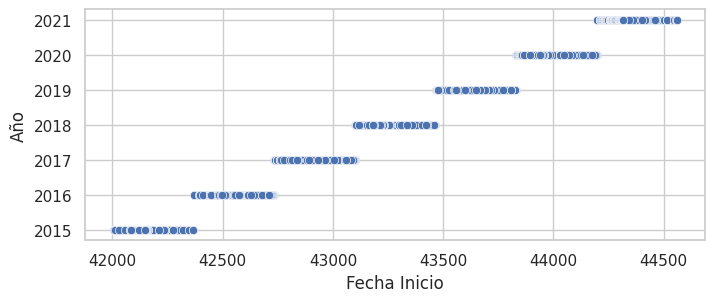

In [99]:
#Filas con valor numérico en Fecha Inicio
filas_numericas_inicio = incendios[['Año','Fecha Inicio']][valores_convertidos.notna()]
filas_numericas_inicio = filas_numericas_inicio.astype(int)

#Filas con valor numérico en Fecha Termino
valores_convertidos = pd.to_numeric(incendios['Fecha Termino'], errors='coerce')
filas_numericas_termino = incendios[['Año','Fecha Termino']][valores_convertidos.notna()]
filas_numericas_termino = filas_numericas_termino.astype(int)

sns.set(style="whitegrid")
plt.figure(figsize=(8,3))
sns.scatterplot(data=filas_numericas_inicio, x ='Fecha Inicio', y ='Año')

Comprobamos que los valores numéricos correspondan a días de un año y los que se encuentran en determinado rango corresponden a un año especifico.

In [100]:
años = sorted(filas_numericas_inicio['Año'].unique())
minimos = []
maximos = []

for año in años:
  minimo_año = filas_numericas_inicio['Fecha Inicio'][filas_numericas_inicio['Año']==año].min()
  minimos.append(minimo_año)
  maximo_año = filas_numericas_inicio['Fecha Inicio'][filas_numericas_inicio['Año']==año].max()
  maximos.append(maximo_año)
  print('Año: {}\n Fecha minimo: {}\n Fecha maximo: {}\n '.format(año, minimo_año, maximo_año))

Año: 2015
 Fecha minimo: 42005
 Fecha maximo: 42367
 
Año: 2016
 Fecha minimo: 42369
 Fecha maximo: 42734
 
Año: 2017
 Fecha minimo: 42731
 Fecha maximo: 43100
 
Año: 2018
 Fecha minimo: 43101
 Fecha maximo: 43464
 
Año: 2019
 Fecha minimo: 43466
 Fecha maximo: 43830
 
Año: 2020
 Fecha minimo: 43831
 Fecha maximo: 44196
 
Año: 2021
 Fecha minimo: 44196
 Fecha maximo: 44561
 


*  El máximo del año 2017 y el mínimo del año 2018 difieren por uno. A partir de esto, deducimos que el número 43100 corresponde al 31/12/2017 y 43101 corresponde al 01/01/2018.
*  Lo mismo ocurre con el máximo del año 2019 y el mínimo de 2020. Entonces 43830 corresponde a 31/12/2019 y 43831 a 01/01/2020.

Utilizando esta información, obtenemos los fechas correspondientes a cada número.

In [101]:
from datetime import datetime, timedelta

fecha_base = datetime(2018,1,1)

#Asociamos a cada número una fecha obtenida a partir de identificar a 01/01/2018 con el número 43101
diccionario_fechas_numeros = {}
for numero in set(filas_numericas_inicio['Fecha Inicio']).union(set(filas_numericas_termino['Fecha Termino'])):
  diferencia_fecha_base_numero = 43101 - numero
  fecha = fecha_base - timedelta(diferencia_fecha_base_numero)
  diccionario_fechas_numeros[numero] = fecha

#Transformamos a tipo entero las fechas que se encuentran en valor numérico
def transformar_a_enteros_fechas(valor):
  try:
    return int(valor)
  except:
    return valor

incendios['Fecha Inicio'] = incendios['Fecha Inicio'].apply(transformar_a_enteros_fechas)
incendios['Fecha Termino'] = incendios['Fecha Termino'].apply(transformar_a_enteros_fechas)

#Reemplazamos los valores numéricos por sus fechas correspondientes
incendios['Fecha Inicio'] = incendios['Fecha Inicio'].replace(diccionario_fechas_numeros)

incendios['Fecha Termino'] = incendios['Fecha Termino'].replace(diccionario_fechas_numeros)

In [102]:
#Transformamos las fechas restantes a formato datetime

def transformar_fecha(fecha):
  try:
    return datetime.strptime(fecha, '%d/%m/%Y')
  except:
    return fecha

incendios['Fecha Inicio'] = incendios['Fecha Inicio'].apply(transformar_fecha)
incendios['Fecha Termino'] = incendios['Fecha Termino'].apply(transformar_fecha)

In [103]:
incendios[['Fecha Inicio','Fecha Termino']]

,Fecha Inicio,Fecha Termino
0,2016-11-09,2016-11-09
1,2017-08-28,2017-08-28
2,2017-08-29,2017-08-29
3,2017-09-01,2017-09-01
4,2019-10-24,2019-10-26
...,...,...
54825,2022-06-09,2022-06-10
54826,2022-06-10,2022-06-10
54827,2022-06-28,2022-06-28
54828,2022-05-15,2022-05-24


Con la información adecuada de las fechas, actualizamos las columnas Año y Duración días.

In [104]:
incendios['Año'] = incendios['Fecha Inicio'].dt.year

In [105]:
def categoria_fecha(duracion):
  if duracion==0:
    return '1'
  elif duracion>=1 and duracion <3:
    return '2 ó 3'
  elif duracion>=3 and duracion <7:
    return '4 a 7'
  elif duracion>=7:
    return '7 ó más'

incendios['Duración días'] = (incendios['Fecha Termino'] - incendios['Fecha Inicio']).dt.days
incendios['Duración días'] = incendios['Duración días'].apply(categoria_fecha)

In [106]:
incendios[['Duración días']]

,Duración días
0,1
1,1
2,1
3,1
4,2 ó 3
...,...
54825,2 ó 3
54826,1
54827,1
54828,7 ó más


Ahora transformamos las columnas de los Indicadores de Eficiencia a formato de días, horas y  minutos para una mejor comprensión.

In [107]:
def transformar_numerico_a_tiempo(tiempo):
  try:
    if tiempo.count(':')==2 and tiempo.count(';')==0 and tiempo.count('.')==0:
      horas, minutos = map(int, tiempo.split(':')[0:2])

    elif tiempo.count(':')==1 and tiempo.count(';')==0  and tiempo.count('.')==0:
      horas, minutos = map(int, tiempo.split(':'))

    elif tiempo.count('.')<=1 and tiempo.count(';')==0  and tiempo.count(':')==0:   #Convertimos los puntos decimales a timedelta
      duracion = timedelta(days=float(tiempo))
      horas, segundos = divmod(duracion.seconds, 3600)
      minutos, segundos = divmod(segundos, 60)
      duracion = timedelta(days=duracion.days, hours=horas, minutes=minutos, seconds=int(round(segundos)))
      return duracion

    #Casos especiales
    elif tiempo.count(';')==1 and tiempo.count(';:')==0: #Identificamos previamente que la aparición de ; ocurre como separación de las horas
      horas=int(tiempo.split(';')[0])
      resto_split = tiempo.split(';')[1]
      minutos = int(resto_split.split(':')[0])

    elif tiempo.count(';:')==1:
      resto_split = tiempo.split(';')[0]
      horas, minutos = map(int, resto_split.split(':'))

    elif tiempo.count('::')==1:
      if tiempo.split('::')[1].count(':')==0:
        minutos = int(tiempo.split('::')[1])
        resto_split = tiempo.split('::')[0]
        horas = int(resto_split.split(':')[1])
      else:
        horas, minutos = map(int, tiempo.split('::')[1].split(':'))

    elif tiempo.count('.')==1 and tiempo.count(':')==1:
      minutos = int(tiempo.split(':')[1])
      resto_split = tiempo.split(':')[0]
      horas = int(resto_split.split('.')[1])

    elif tiempo.count('a.m.')==1 or tiempo.count('a. m.')==1:
      horas, minutos = map(int, tiempo.split(':')[0:2])

    return timedelta(hours=horas, minutes=minutos)
  except:
    return tiempo

In [108]:
incendios['Duración'] = incendios['Duración'].apply(transformar_numerico_a_tiempo)

Aplicamos un procedimiento similar con las columnas Detección y Llegada

In [109]:
incendios['Detección'] = incendios['Detección'].apply(transformar_numerico_a_tiempo)
incendios['Llegada'] = incendios['Llegada'].apply(transformar_numerico_a_tiempo)

In [110]:
incendios[['Detección', 'Llegada', 'Duración']]

,Detección,Llegada,Duración
0,0 days 00:20:00,0 days 00:15:00,0 days 09:29:59
1,0 days 00:04:59,0 days 00:13:00,0 days 02:39:59
2,0 days 00:09:59,0 days 00:18:59,0 days 03:09:59
3,0 days 00:02:59,0 days 00:17:00,0 days 01:50:00
4,0 days 00:09:59,0 days 00:29:59,2 days 05:15:00
...,...,...,...
54825,0 days 00:10:00,0 days 03:10:00,0 days 11:10:00
54826,0 days 00:20:00,0 days 02:50:00,0 days 08:50:00
54827,0 days 00:20:00,0 days 00:40:00,0 days 04:00:00
54828,0 days 00:20:00,0 days 00:00:00,9 days 05:30:00


Verifiquemos que la duración de días obtenida restando la fecha de termino con la fecha de inicio del incendio es mayor o igual a los días expresados por la duración.

In [111]:
#Modificamos aquellas inconsistencias por la diferencia de días
inconsistencias = (incendios['Fecha Termino']-incendios['Fecha Inicio']).dt.days<incendios['Duración'].dt.days
incendios.loc[inconsistencias, 'Duración'] = ((incendios['Fecha Termino']-incendios['Fecha Inicio']).dt.days).astype(int)*timedelta(days=1)

In [112]:
#La modificación resultante es
incendios[['Fecha Inicio', 'Fecha Termino', 'Duración']].loc[inconsistencias]

,Fecha Inicio,Fecha Termino,Duración
1258,2018-05-21,2018-05-23,2 days
2121,2019-06-03,2019-06-05,2 days
4410,2019-04-21,2019-04-29,8 days
4739,2019-05-12,2019-05-14,2 days
5260,2017-06-17,2017-06-23,6 days
...,...,...,...
49057,2022-11-28,2022-12-03,5 days
51231,2022-05-12,2022-05-12,0 days
51315,2022-05-19,2022-01-20,-119 days
51413,2022-05-28,2022-05-29,1 days


Podemos observar que existen dos inconsistencias en la captura de la fecha de termino, produciendo una Duración errónea.  

In [113]:
inconsistencias = incendios['Fecha Termino']<incendios['Fecha Inicio']
incendios.loc[inconsistencias]

,Año,Clave del incendio,latitud_grados,latitud_minutos,latitud_segundos,Latitud,longitud_grados,longitud_minutos,longitud_segundos,Longitud,...,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Tamaño,Detección,Llegada,Duración
39318,2019,19-07-0296,14,58,18.29,14.971747,92,36,2.93,-92.600814,...,0.0,0.0,0.0,60.00,0.0,60.00,51 a 100 Hectáreas,0 days 00:09:59,0 days 00:40:00,-30 days
51315,2022,22-14-1221,19,52,3.54,19.867650,102,56,0.09,-102.933358,...,0.0,0.0,0.0,8.12,0.0,8.12,6 a 10 Hectáreas,0 days 00:15:00,0 days 02:45:00,-119 days


Al no tener certeza sobre la fecha de termino exacta y al tratarse de pocos registros, serán eliminados del dataset.

In [114]:
incendios.drop([39318,51315], inplace=True)

Actualizamos el contenido de Duración días para tener una mejor precisión.

In [115]:
incendios['Duración días'] = incendios['Duración'].dt.days.apply(categoria_fecha)
incendios[['Duración', 'Duración días']]

,Duración,Duración días
0,0 days 09:29:59,1
1,0 days 02:39:59,1
2,0 days 03:09:59,1
3,0 days 01:50:00,1
4,2 days 05:15:00,2 ó 3
...,...,...
54825,0 days 11:10:00,1
54826,0 days 08:50:00,1
54827,0 days 04:00:00,1
54828,9 days 05:30:00,7 ó más


Las columnas:
*  Latitud y Longitud son suficientes para determinar la ubicación del incendio.
*  Clave de municipio funcionó para verificar que no existe un incendio duplicado

Por lo tanto, podemos borrar las siguientes columnas que son redundantes.

In [116]:
columnas = ['Clave del incendio','latitud_grados','latitud_minutos',
            'latitud_segundos','longitud_grados','longitud_minutos',
            'longitud_segundos','Estado','Municipio','Predio']
incendios = incendios.drop(columns=columnas, axis=1)

Cambiamos el nombre de las columnas cuyo nombre se encuentra abreviado.

In [117]:
nombres_columnas = {'CVE_ENT': 'Clave Entidad', 'CVE_MUN': 'Clave Municipio', 'CVEGEO':'Clave Geográfica'}
incendios.rename(columns=nombres_columnas, inplace=True)

In [118]:
incendios.head()

,Año,Latitud,Longitud,Clave Entidad,Clave Municipio,Clave Geográfica,Región,Causa,Causa especifica,Fecha Inicio,...,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Tamaño,Detección,Llegada,Duración
0,2016,32.474317,-117.117208,2,5,2005,Noroeste,Desconocidas,Desconocidas,2016-11-09,...,0.0,0.0,2.0,1.5,0.0,3.5,0 a 5 Hectáreas,0 days 00:20:00,0 days 00:15:00,0 days 09:29:59
1,2017,32.462944,-117.102867,2,1,2001,Noroeste,Quema de Basureros,No Aplica,2017-08-28,...,0.0,0.0,0.0,1.0,0.0,1.0,0 a 5 Hectáreas,0 days 00:04:59,0 days 00:13:00,0 days 02:39:59
2,2017,32.445400,-117.102239,2,5,2005,Noroeste,Quema de Basureros,No Aplica,2017-08-29,...,0.0,0.0,0.0,0.5,0.0,0.5,0 a 5 Hectáreas,0 days 00:09:59,0 days 00:18:59,0 days 03:09:59
3,2017,32.479917,-117.085781,2,4,2004,Noroeste,Quema de Basureros,No Aplica,2017-09-01,...,0.0,0.0,5.0,0.0,0.0,5.0,0 a 5 Hectáreas,0 days 00:02:59,0 days 00:17:00,0 days 01:50:00
4,2019,32.452200,-117.069539,2,4,2004,Noroeste,Actividades Ilícitas,Vandalismo,2019-10-24,...,0.0,0.0,328.0,252.6,0.0,580.6,Mayor a 100 Hectáreas,0 days 00:09:59,0 days 00:29:59,2 days 05:15:00


In [119]:
incendios.describe()

,Año,Latitud,Longitud,Clave Entidad,Clave Municipio,Clave Geográfica,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Detección,Llegada,Duración
count,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794.000000,54794,54794,54794
mean,2018.596142,20.585292,-100.756258,14.775304,55.801748,14831.105614,1.854148,1.715219,16.927483,26.493944,20.493236,72.340041,0 days 00:55:29.059440814,0 days 02:41:04.881866627,0 days 21:51:33.209676241
std,2.172006,3.212623,4.402521,6.719619,66.478229,6737.551564,38.476164,20.018943,176.158712,256.092476,154.370961,499.540013,0 days 04:36:19.460596351,0 days 12:37:23.264040772,2 days 01:53:06.160293088
min,2015.000000,14.696064,-118.286697,1.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,2017.000000,19.116645,-103.470292,9.000000,12.000000,9012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0 days 00:04:59,0 days 00:24:59,0 days 02:37:00
50%,2018.000000,19.534945,-99.878601,15.000000,34.000000,15014.000000,0.000000,0.000000,0.500000,1.000000,0.000000,4.500000,0 days 00:09:59,0 days 00:45:00,0 days 05:00:00
75%,2021.000000,20.863427,-98.698389,17.000000,83.000000,17007.000000,0.000000,0.000000,3.000000,5.060000,3.000000,20.500000,0 days 00:29:59,0 days 01:30:00,0 days 21:20:00
max,2022.000000,32.599875,-86.798778,32.000000,570.000000,32058.000000,4893.000000,1271.708000,17382.420000,17220.150000,8717.330000,23809.000000,10 days 00:00:00,57 days 00:00:00,68 days 21:00:00


## **Análisis Exploratorio de Datos**

**Rango de valores del Total de hectáreas**

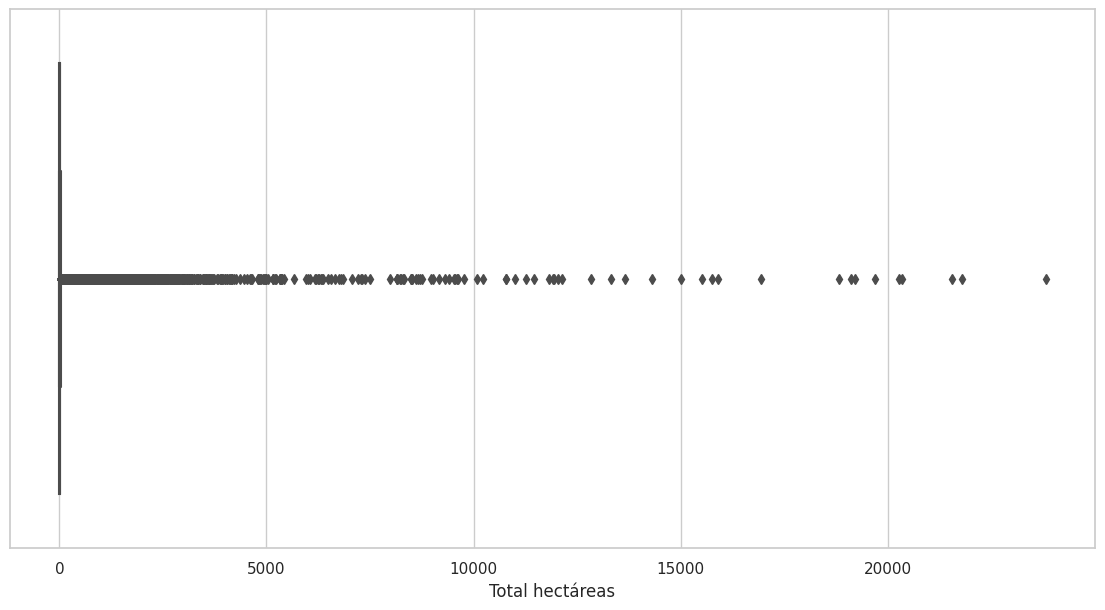

In [120]:
plt.figure(figsize=(14,7))
sns.boxplot(x=incendios['Total hectáreas'])
plt.show()

**Insights**

* La cantidad de Total hectáreas se encuentra muy dispersa llegando hasta las 20000 hectáres, a partir del tercer cuartil de los datos.

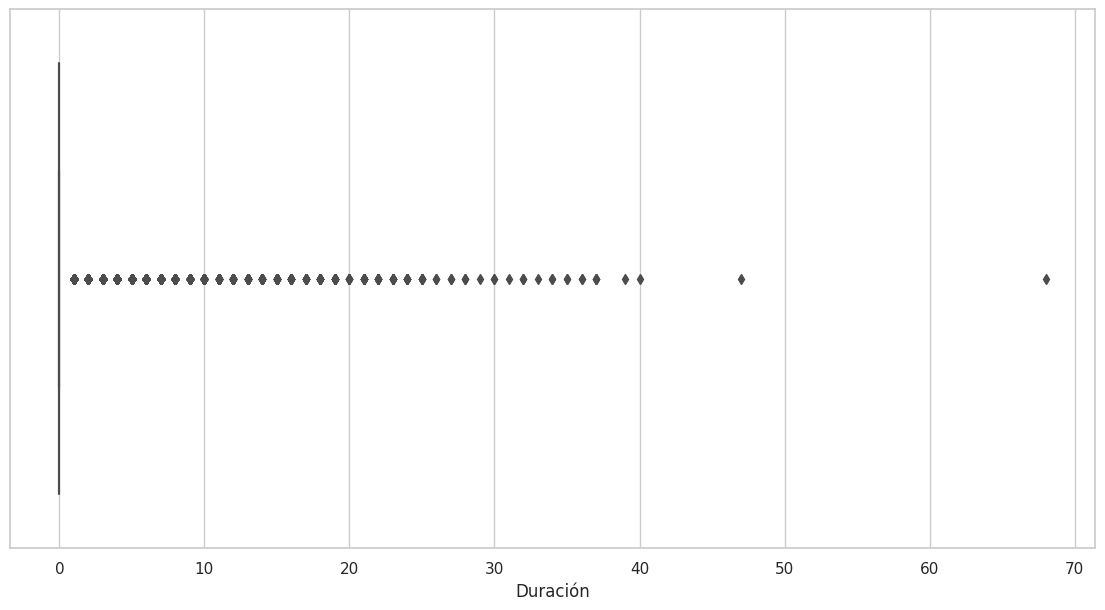

Media de días: 0 days 21:51:33.209676241
 Std: 2 days 01:53:06.160293088


In [121]:
duracion = incendios['Duración']
plt.figure(figsize=(14,7))
sns.boxplot(x=duracion.dt.days)
plt.show()
print('Media de días: {}\n Std: {}'.format(duracion.mean(), duracion.std()))

**Visualizamos el Total de hectáreas para obtener algunas conclusiones**

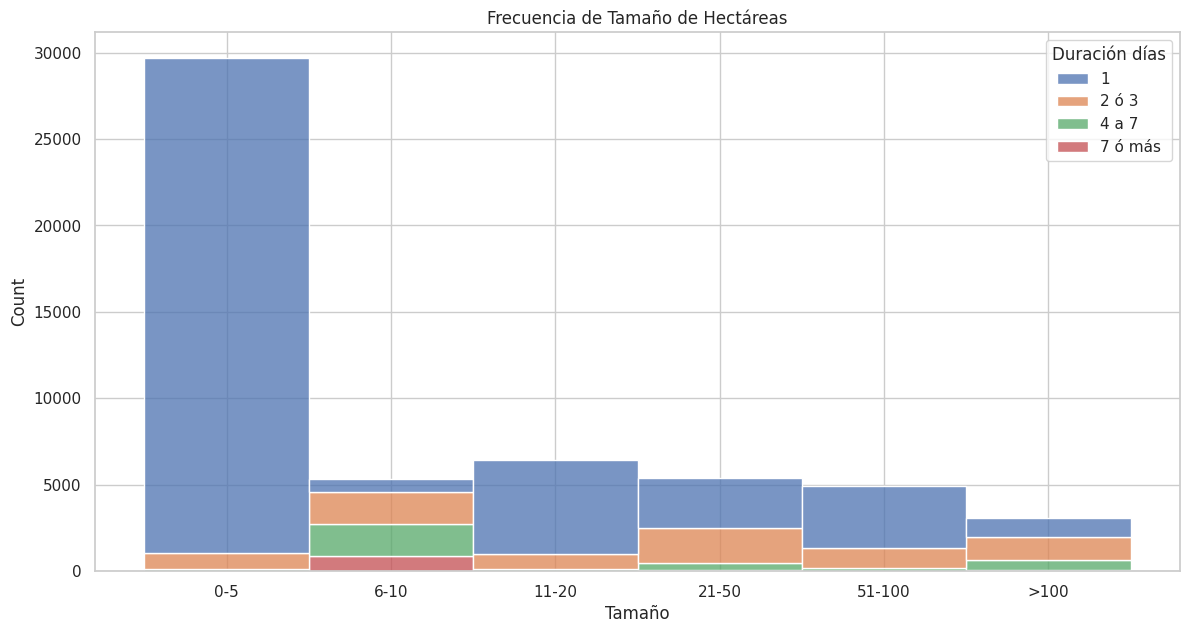

In [122]:
plt.figure(figsize=(14,7))
sns.histplot(data=incendios,
             x='Tamaño',
             color='b',
             multiple='stack',
             hue='Duración días'
             )
hist = plt.gca()
tamaño = ['0-5', '6-10', '11-20', '21-50', '51-100', '>100']
hist.set_xticklabels(tamaño)
plt.title('Frecuencia de Tamaño de Hectáreas')
plt.show()

**Insights**

* Los incendios que afectan de 0-5, 11-20 y 51-100 hectáreas son en su mayoría son de 1 día de duración.
* El número de incendios que afectan de 6-10 hectáreas que duran de 4 a 7 días es casi igual al de aquellos que duran de 2 a 3 días.
* El número de incendios que afectan más de 100 hectáreas que duran de 2 a 3 días es ligeramente mayor que de aquellos que duran 1 día.  

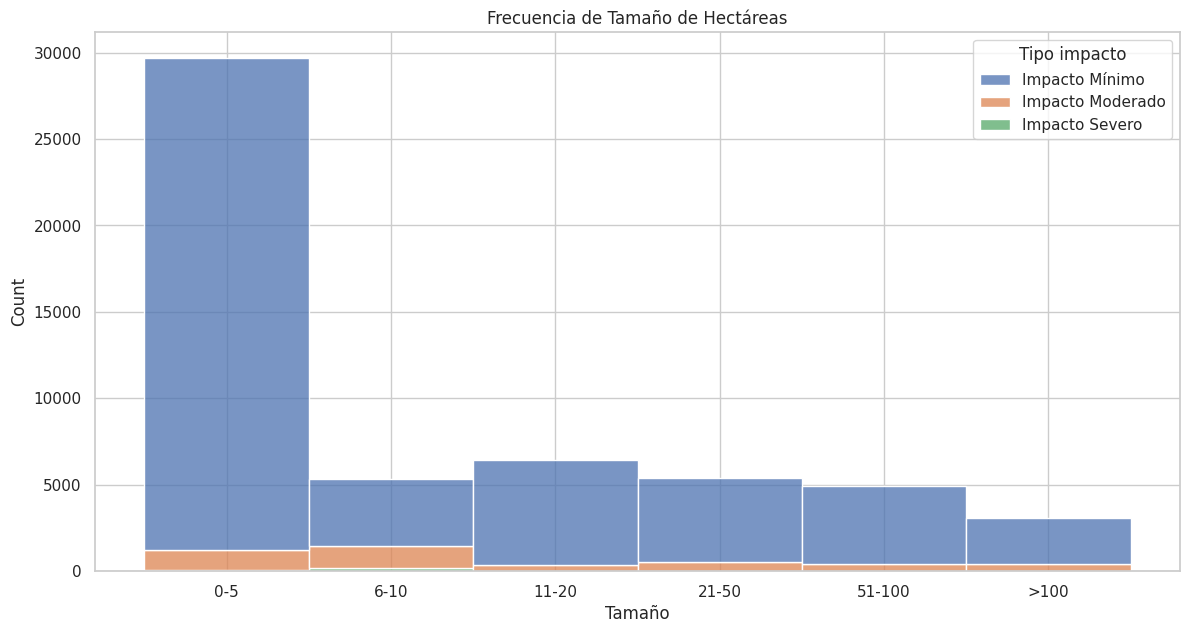

In [123]:
plt.figure(figsize=(14,7))
sns.histplot(data=incendios,
             x='Tamaño',
             color='b',
             multiple='stack',
             hue='Tipo impacto'
             )
hist = plt.gca()
tamaño = ['0-5', '6-10', '11-20', '21-50', '51-100', '>100']
hist.set_xticklabels(tamaño)
plt.title('Frecuencia de Tamaño de Hectáreas')
plt.show()

**Insights**

* Los incendios con impacto mínimo son mayoría en todos los tamaños de hectáreas afectadas.
* Existe una gran cantidad de incendios catalogados de impacto mínimo que afectaron una cantidad superior a las 100 hectáreas, posiblemente se trate de incendios que ocurrieron lejos de zonas habitables.
* La proporción de incendios con impacto severo es menor en todos los tamaños de hectáreas afectadas. Se puede notar una mayor cantidad en incendios que afectaron 6 a 10 hectáreas.

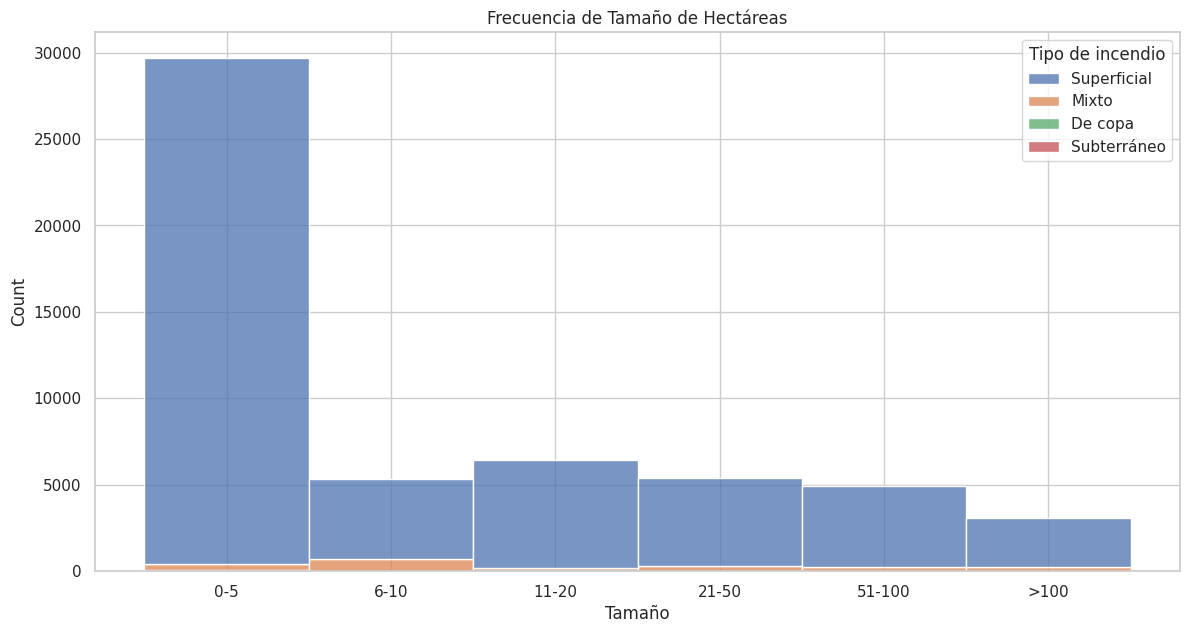

In [124]:
plt.figure(figsize=(14,7))
sns.histplot(data=incendios,
             x='Tamaño',
             color='b',
             multiple='stack',
             hue='Tipo de incendio'
             )
hist = plt.gca()
tamaño = ['0-5', '6-10', '11-20', '21-50', '51-100', '>100']
hist.set_xticklabels(tamaño)
plt.title('Frecuencia de Tamaño de Hectáreas')
plt.show()

**Insights**

* Los incendios superficiales son predominantes en todos los tamaños de hectáreas, seguido de los incendios mixtos que aparecen con mucho menor frecuencia que estos últimos.

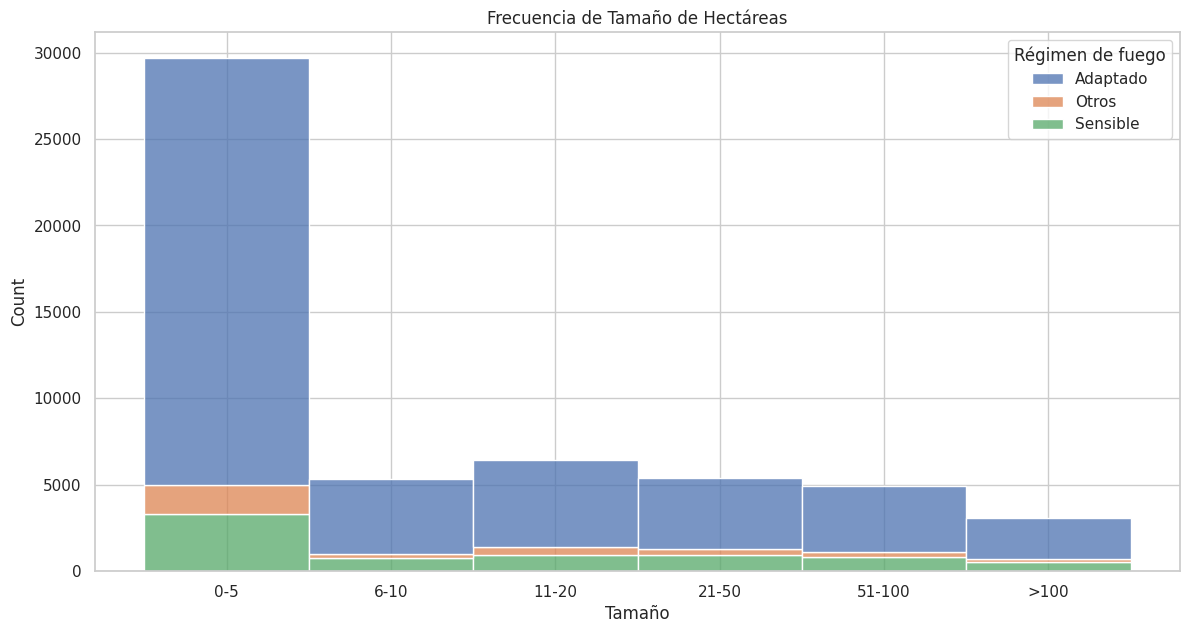

In [125]:
plt.figure(figsize=(14,7))
sns.histplot(data=incendios,
             x='Tamaño',
             color='b',
             multiple='stack',
             hue='Régimen de fuego'
             )
hist = plt.gca()
tamaño = ['0-5', '6-10', '11-20', '21-50', '51-100', '>100']
hist.set_xticklabels(tamaño)
plt.title('Frecuencia de Tamaño de Hectáreas')

plt.show()

**Insights**

* El régimen de fuego predominante es Adaptado en todos los tamaños de hectáreas.

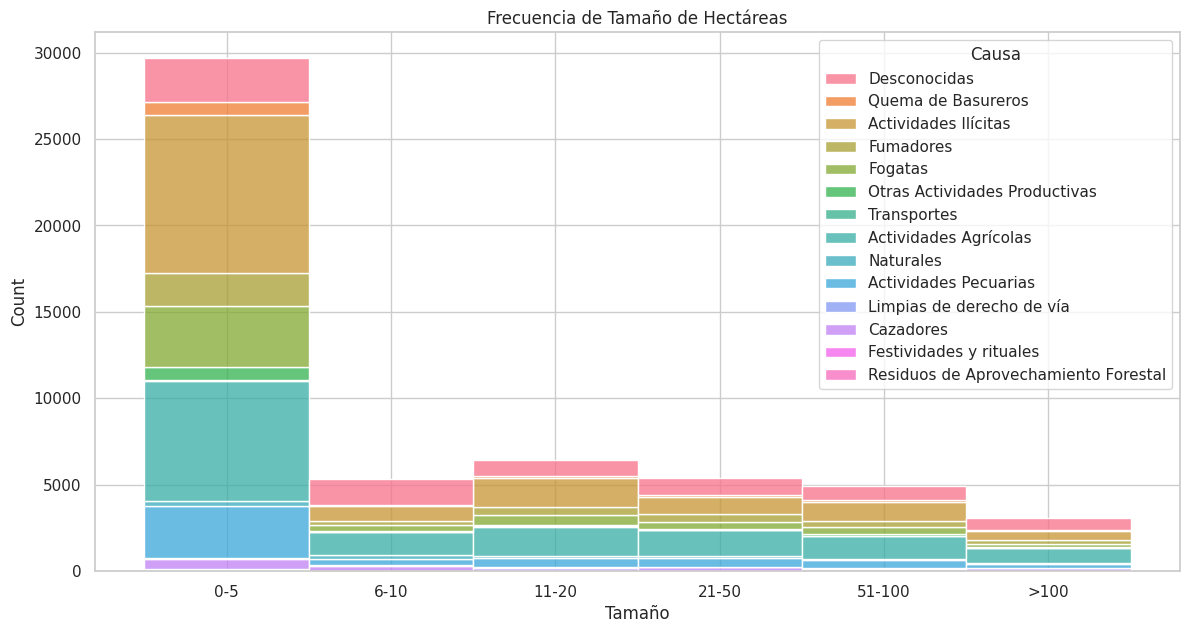

In [126]:
plt.figure(figsize=(14,7))
sns.histplot(data=incendios,
             x='Tamaño',
             color='b',
             multiple='stack',
             hue='Causa'
             )
hist = plt.gca()
tamaño = ['0-5', '6-10', '11-20', '21-50', '51-100', '>100']
hist.set_xticklabels(tamaño)
plt.title('Frecuencia de Tamaño de Hectáreas')
plt.show()

**Insights**

* Los incendios producidos por Actividades Ilícitas predominan en los incendios que afectan de 0 a 5 hectáreas, seguidos por aquellos que son producidos por Actividades Agrícolas.
* Un fenómeno similar ocurre con el resto de tamaños de hectáreas afectadas.

**Análisis de la columna Tamaño**
1. Distribución de la columna Tamaño
2. ¿Cómo impacta el total de hectáreas en el impacto del incendio?

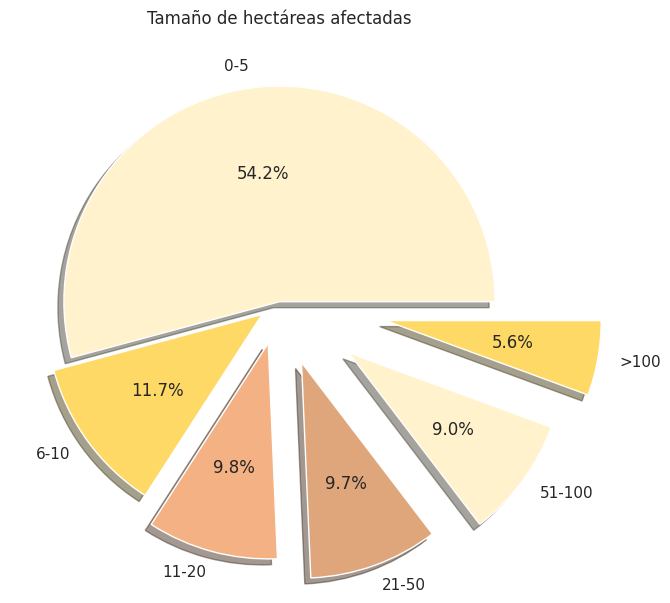

In [127]:
plt.figure(figsize=(14,7))
plt.pie(x=incendios['Tamaño'].value_counts(),
        explode=[i*0.1 for i in range(0,6)],
        autopct='%1.1f%%',
        shadow=True,
        labels=tamaño,
        colors=['#FFF2CC','#FFD966','#F4B183','#DFA67B'])
plt.title('Tamaño de hectáreas afectadas')
plt.show()

Indagaremos sobre el impacto de la columna Tamaño con el impacto del incendio

In [128]:
impacto_agrupado = incendios.groupby('Tipo impacto').mean()
impacto_agrupado

,Año,Latitud,Longitud,Clave Entidad,Clave Municipio,Clave Geográfica,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas
Tipo impacto,,,,,,,,,,,,
Impacto Moderado,2018.401775,19.975790,-99.280965,13.915208,61.950949,13977.159231,10.500356,8.840877,71.764564,88.652121,66.621234,262.785632
Impacto Mínimo,2018.609041,20.643947,-100.893165,14.847690,55.226249,14902.916264,0.622417,0.840399,10.863304,19.411510,15.703781,50.752567
Impacto Severo,2018.934466,19.422601,-98.560570,14.402913,65.546117,14468.458738,67.167723,38.405813,217.669653,279.522434,151.289460,833.873725


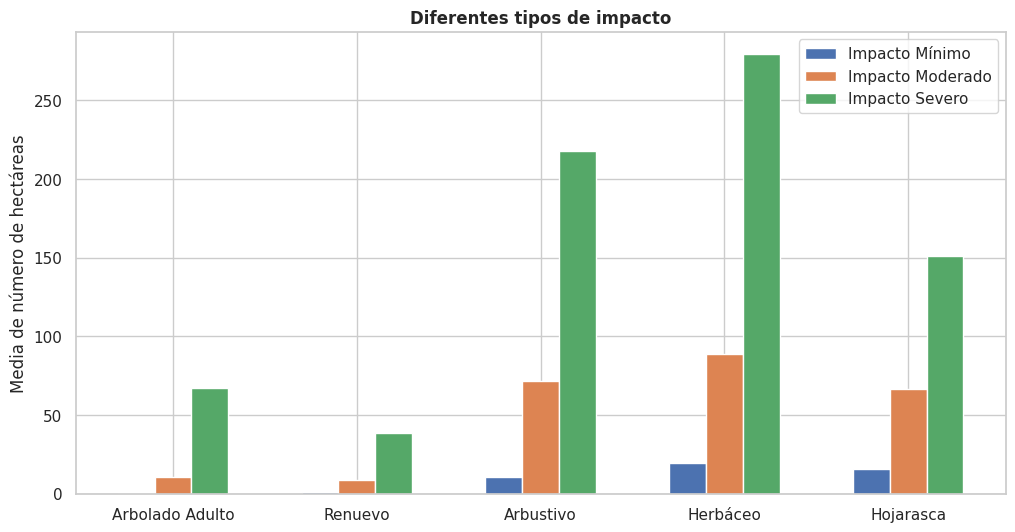

In [129]:
plt.figure(figsize=(12, 6))

X = ['Arbolado Adulto', 'Renuevo', 'Arbustivo', 'Herbáceo', 'Hojarasca']

impacto_moderado = [impacto_agrupado['Arbolado Adulto'][0], impacto_agrupado['Renuevo'][0],impacto_agrupado['Arbustivo'][0],impacto_agrupado['Herbáceo'][0],impacto_agrupado['Hojarasca'][0]]
impacto_minimo = [impacto_agrupado['Arbolado Adulto'][1], impacto_agrupado['Renuevo'][1],impacto_agrupado['Arbustivo'][1],impacto_agrupado['Herbáceo'][1],impacto_agrupado['Hojarasca'][1]]
impacto_severo = [impacto_agrupado['Arbolado Adulto'][2], impacto_agrupado['Renuevo'][2],impacto_agrupado['Arbustivo'][2],impacto_agrupado['Herbáceo'][2],impacto_agrupado['Hojarasca'][2]]

eje_X = np.arange(len(X))

plt.bar(eje_X - 0.2, impacto_minimo, 0.2, label = 'Impacto Mínimo')
plt.bar(eje_X, impacto_moderado, 0.2, label = 'Impacto Moderado')
plt.bar(eje_X + 0.2, impacto_severo, 0.2, label = 'Impacto Severo')

plt.xticks(eje_X, X)
plt.ylabel("Media de número de hectáreas")
plt.title("Diferentes tipos de impacto", fontweight='bold')
plt.legend()
plt.show()

**Insights**
* Los incendios con impacto severo son aquellos que afectan la mayor cantidad de hectáreas en cualquier tipo de superficie.

**Análisis de la columna Duración**
1. Distribución de la columna Duración
2. ¿Cómo impacta la duración en días en el impacto del incendio?

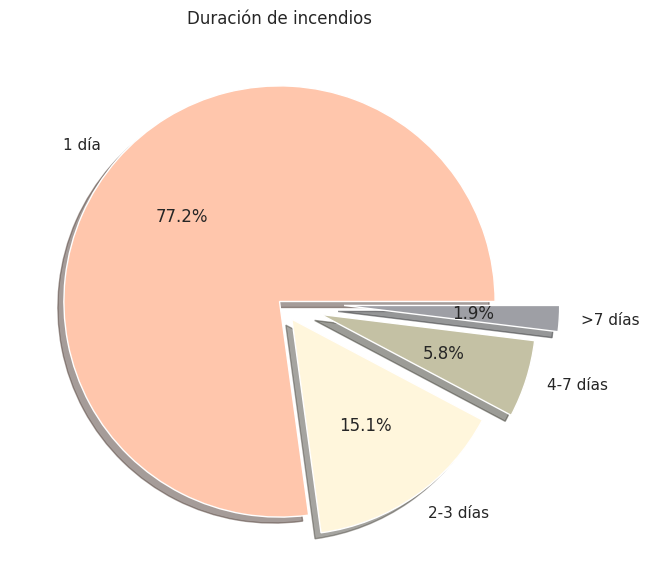

In [130]:
plt.figure(figsize=(14,7))
duraciones=['1 día', '2-3 días', '4-7 días', '>7 días']
plt.pie(x=incendios['Duración días'].value_counts(),
        explode=[i*0.1 for i in range(0,4)],
        autopct='%1.1f%%',
        shadow=True,
        labels=duraciones,
        colors=['#FFC6AC','#FFF6DC','#C4C1A4','#9E9FA5'])
plt.title('Duración de incendios')
plt.show()

Indagaremos sobre la relación que existe entre la duración y el impacto del incendio.

In [131]:
incendios_con_duracion = incendios.copy()
incendios_con_duracion['Días'] = incendios['Duración'].dt.days

In [132]:
impacto_agrupado = incendios_con_duracion.groupby('Tipo impacto').mean()

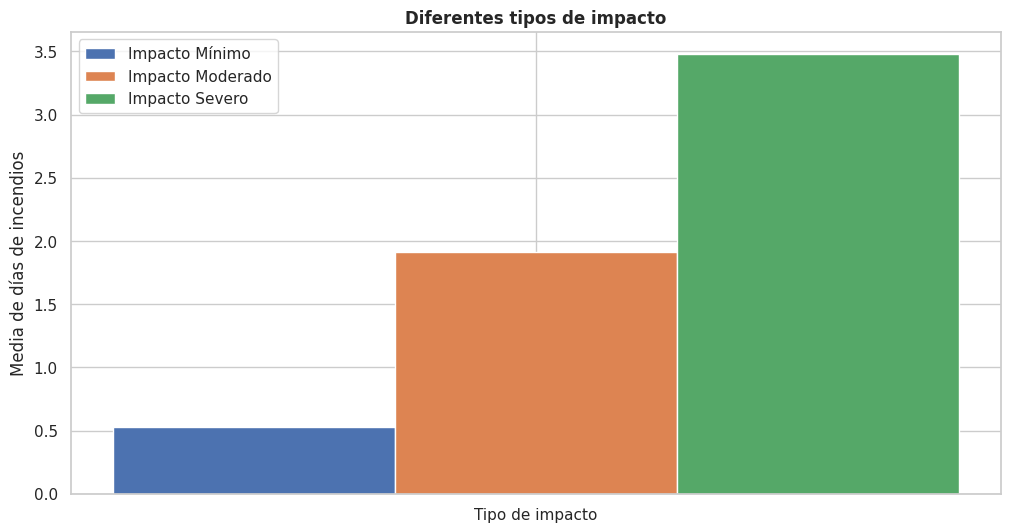

In [133]:
plt.figure(figsize=(12, 6))

X = ['Tipo de impacto']

impacto_moderado = [impacto_agrupado['Días'][0]]
impacto_minimo = [impacto_agrupado['Días'][1]]
impacto_severo = [impacto_agrupado['Días'][2]]

eje_X = np.arange(len(X))

plt.bar(eje_X - 0.2, impacto_minimo, 0.2, label = 'Impacto Mínimo')
plt.bar(eje_X, impacto_moderado, 0.2, label = 'Impacto Moderado')
plt.bar(eje_X + 0.2, impacto_severo, 0.2, label = 'Impacto Severo')

plt.xticks(eje_X, X)
plt.ylabel("Media de días de incendios")
plt.title("Diferentes tipos de impacto", fontweight='bold')
plt.legend()
plt.show()

**Insights**
* Los incendios con un impacto severo tienen una media de días mayor que los de que son de impacto moderado y mínimo.

**Análisis de la columna Causa**
1. Distribución de la columna Causa
2. ¿Cómo impacta la Causa en el impacto del incendio?

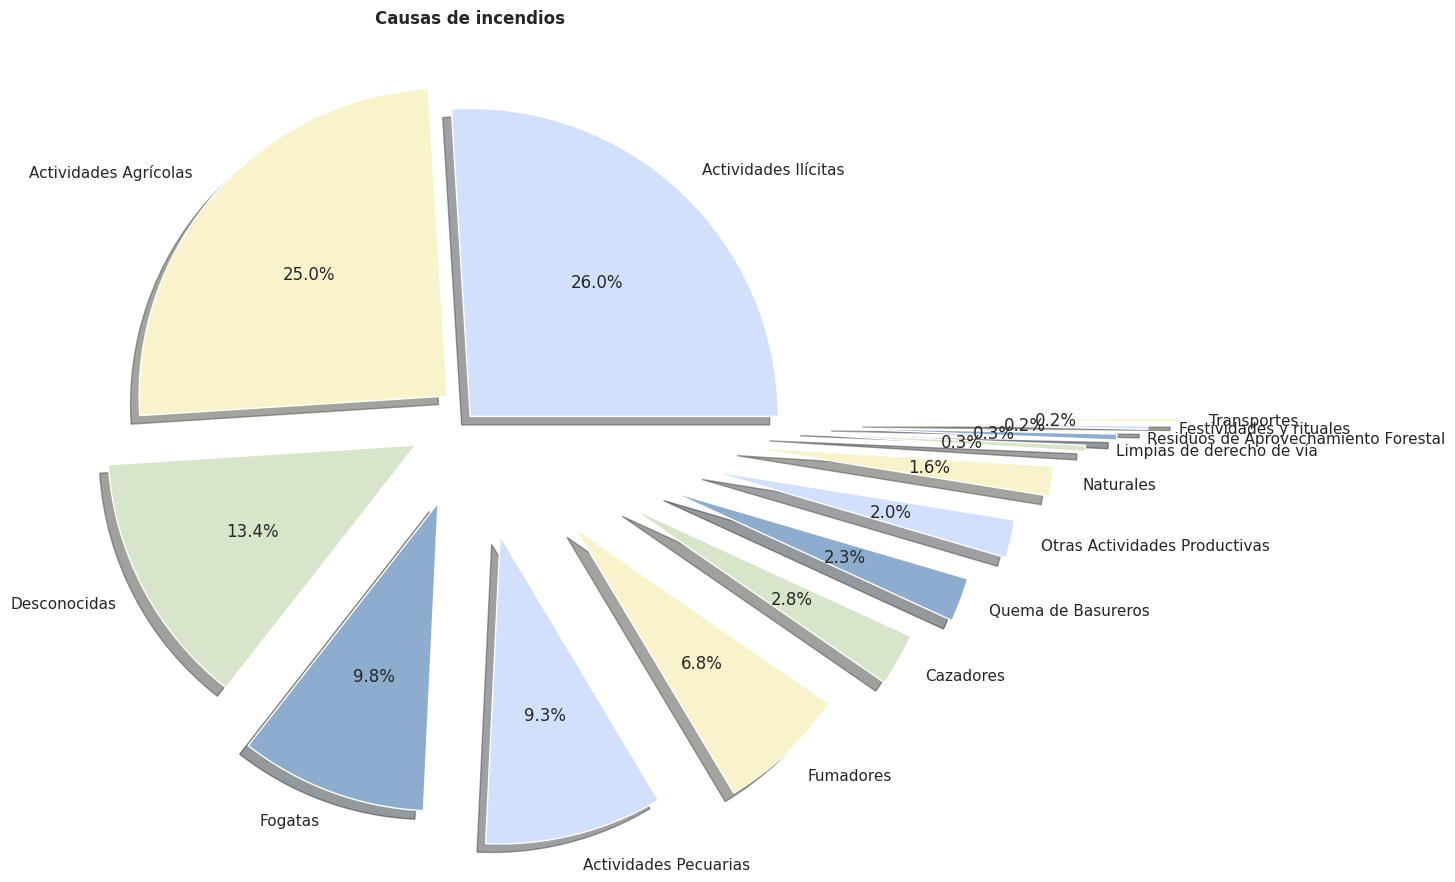

In [134]:
plt.figure(figsize=(14,10))
causas=['Actividades Ilícitas', 'Actividades Agrícolas', 'Desconocidas',
       'Fogatas', 'Actividades Pecuarias', 'Fumadores', 'Cazadores',
       'Quema de Basureros', 'Otras Actividades Productivas', 'Naturales',
       'Limpias de derecho de vía', 'Residuos de Aprovechamiento Forestal',
       'Festividades y rituales', 'Transportes']
plt.pie(x=incendios['Causa'].value_counts(),
        explode=[i*0.1 for i in range(0,len(causas))],
        autopct='%1.1f%%',
        shadow=True,
        labels=causas,
        colors=['#D2E0FB','#F9F3CC','#D7E5CA','#8EACCD'])
plt.title('Causas de incendios', fontweight='bold')
plt.show()

Indagamos sobre la relación entre causas y tipo de impacto.

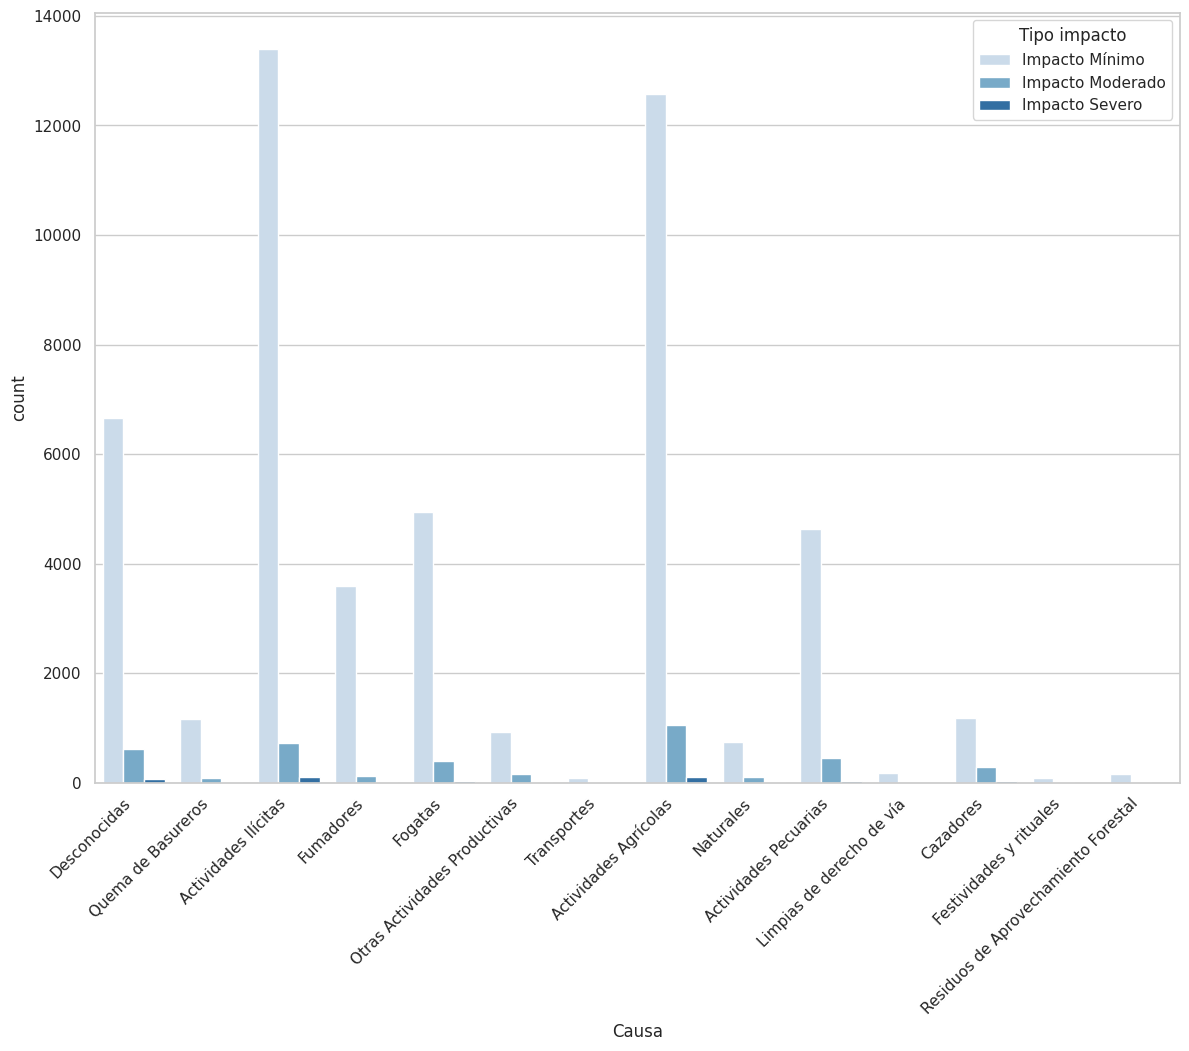

In [135]:
plt.figure(figsize=(14,10))
ax = sns.countplot(data=incendios,
              x='Causa',
              hue='Tipo impacto',
              palette='Blues',
              )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**Insights**
* Todas las causas cuentan con mayor frecuencia de incendios con impacto mínimo, así que no podemos establecer que una causa en específico tiene incidencia en el tipo de impacto.

**Análisis de la columna Causa Específica**
1. Distribución de la columna Causa Específica
2. ¿Cómo impacta la Causa Específica en el impacto del incendio?

In [136]:
#Filtramos aquellas causas que representan más del 1% del total de causas específicas
causas_especificas_filtrada = pd.DataFrame(incendios['Causa especifica'].value_counts()).loc[incendios['Causa especifica'].value_counts()/sum(incendios['Causa especifica'].value_counts())*100>=1]

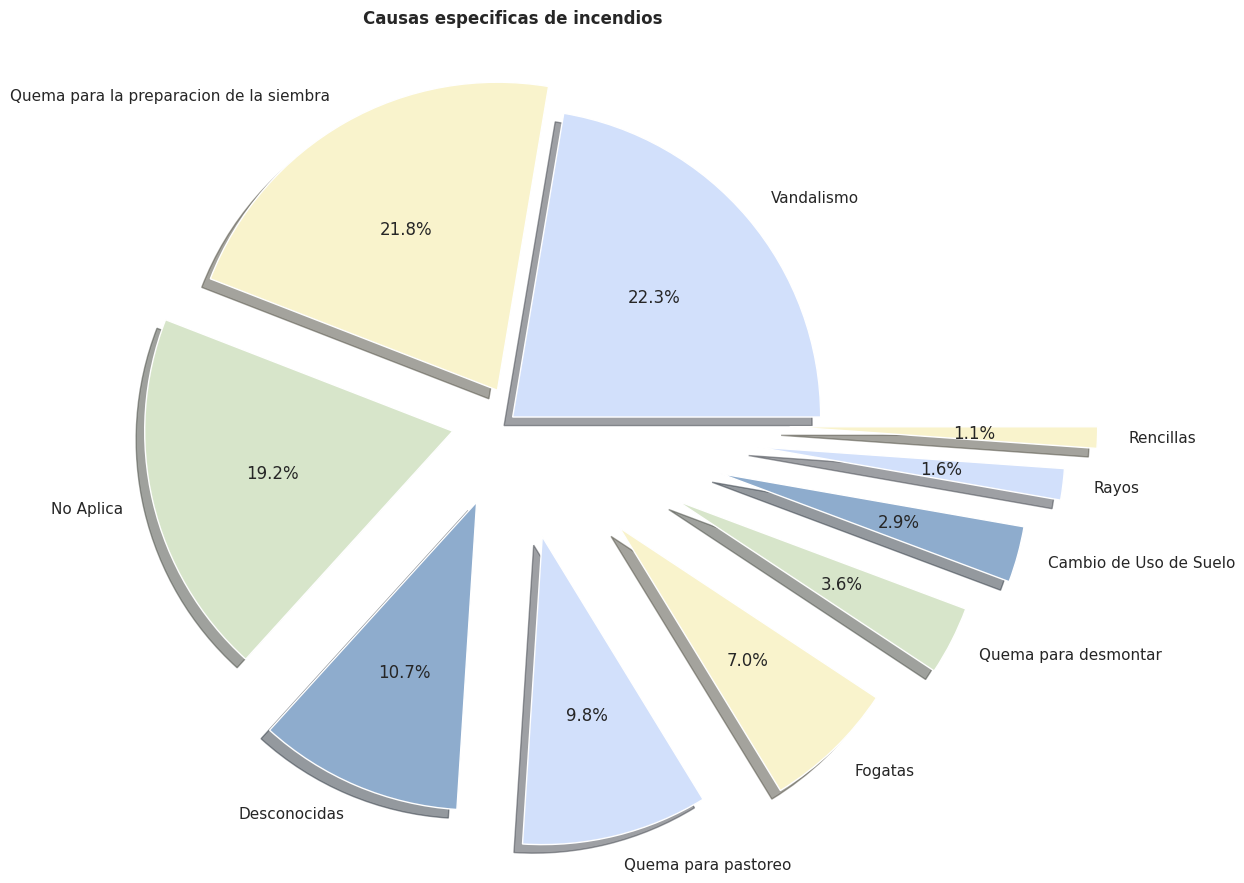

In [137]:
plt.figure(figsize=(14,10))
causas_especificas=causas_especificas_filtrada.index
plt.pie(x=causas_especificas_filtrada['Causa especifica'].values,
        explode=[i*0.1 for i in range(0,len(causas_especificas))],
        autopct='%1.1f%%',
        shadow=True,
        labels=causas_especificas,
        colors=['#D2E0FB','#F9F3CC','#D7E5CA','#8EACCD'])
plt.title('Causas especificas de incendios', fontweight='bold')
plt.show()

Indagamos la relación entre las causas especificas filtradas y el tipo de impacto del incendio

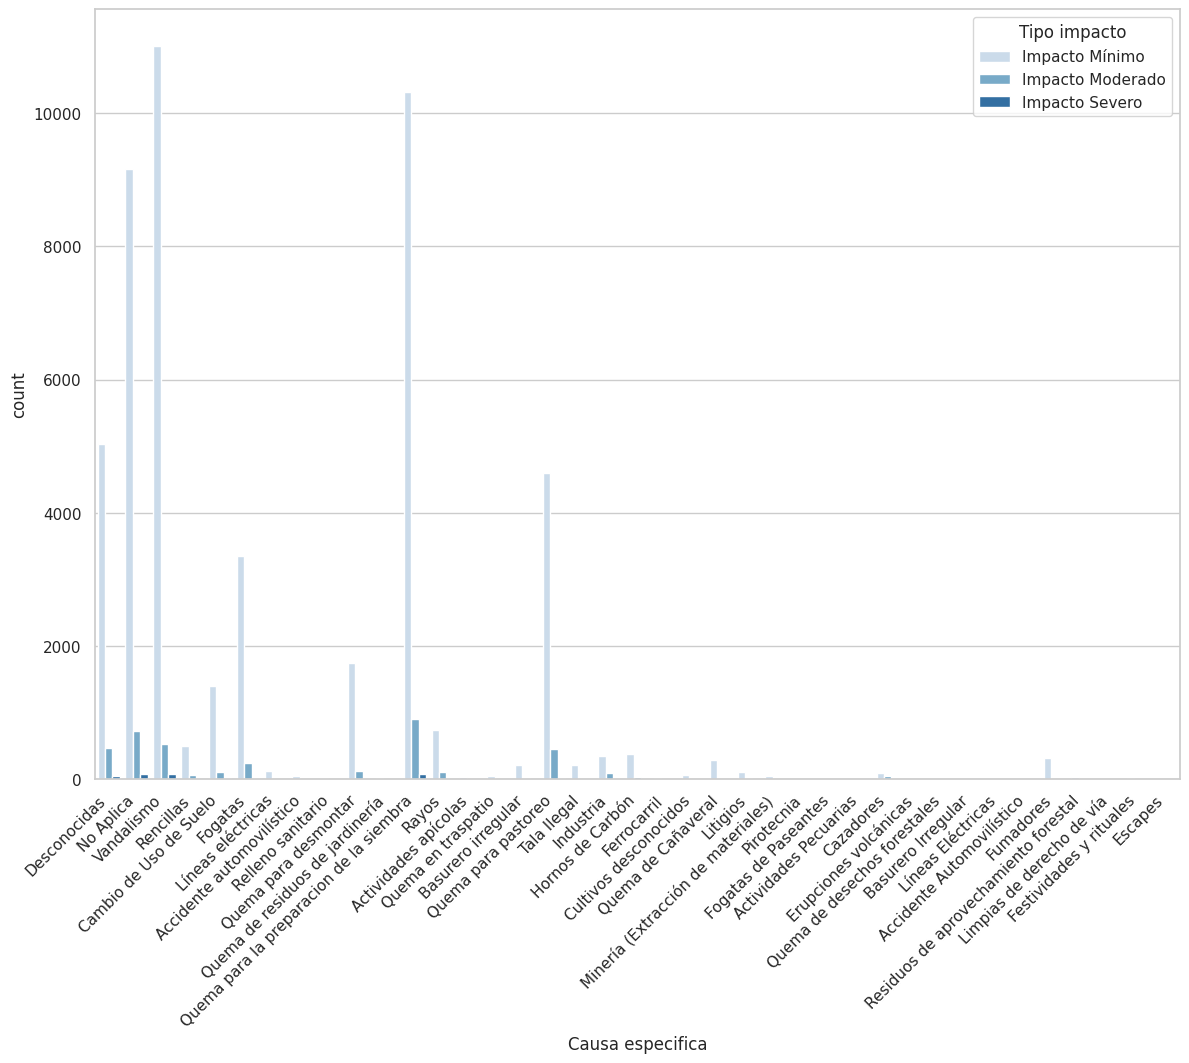

In [138]:
plt.figure(figsize=(14,10))
ax = sns.countplot(data=incendios,
              x='Causa especifica',
              hue='Tipo impacto',
              palette='Blues',
              )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**Insights**
* Todas las causas específicas cuentan con mayor frecuencia de incendios con impacto mínimo, así que no podemos establecer que una causa específica tiene incidencia en el tipo de impacto.

**Analizamos la columna Tipo de Vegetación**
1. Distribución de la columna Tipo de Vegetación
2. ¿Cómo impacta el Tipo de Vegetación en el impacto del incendio?

In [139]:
#Filtramos aquellas causas que representan más del 1% del total de causas específicas
tipo_vegetacion_filtrada = pd.DataFrame(incendios['Tipo Vegetación'].value_counts()).loc[incendios['Tipo Vegetación'].value_counts()/sum(incendios['Tipo Vegetación'].value_counts())*100>=1]

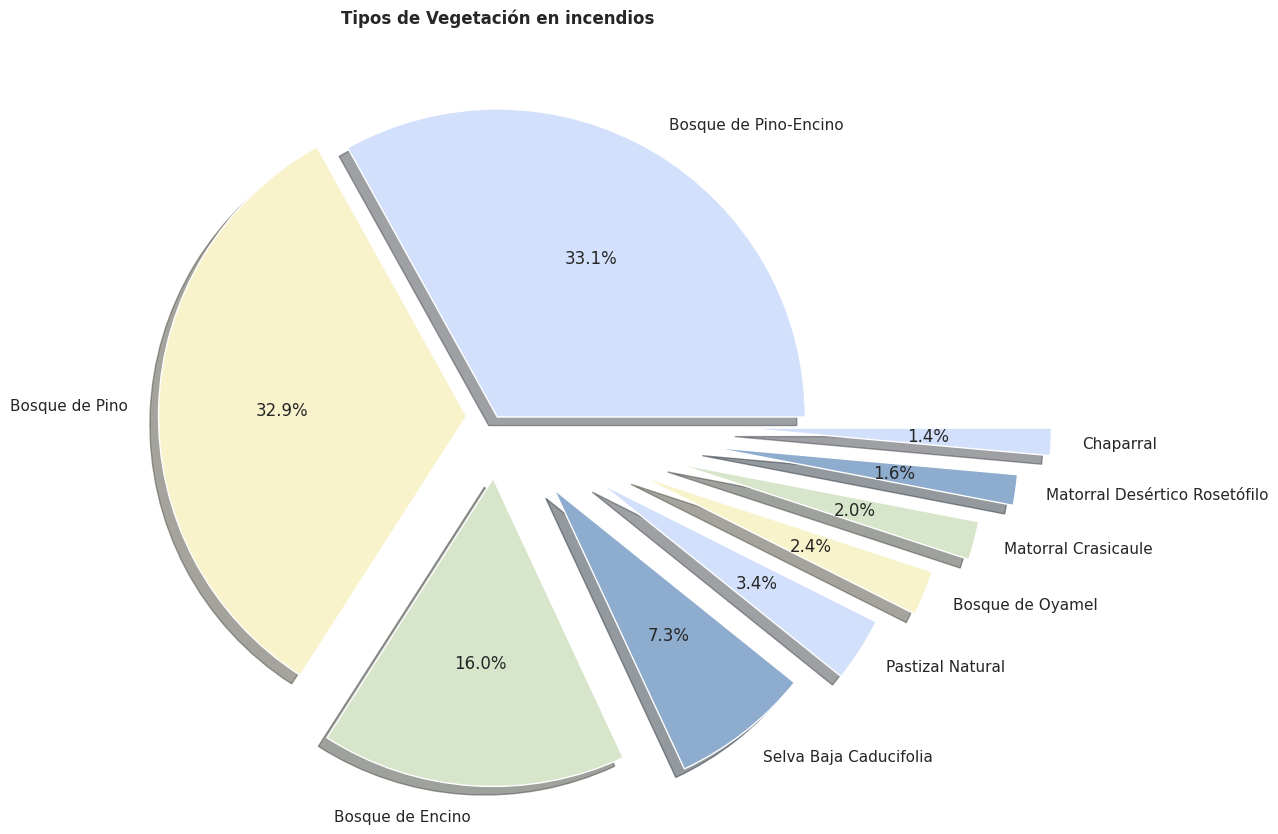

In [140]:
plt.figure(figsize=(14,10))
tipo_vegetacion=tipo_vegetacion_filtrada.index
plt.pie(x=tipo_vegetacion_filtrada['Tipo Vegetación'].values,
        explode=[i*0.1 for i in range(0,len(tipo_vegetacion))],
        autopct='%1.1f%%',
        shadow=True,
        labels=tipo_vegetacion,
        colors=['#D2E0FB','#F9F3CC','#D7E5CA','#8EACCD'])
plt.title('Tipos de Vegetación en incendios', fontweight='bold')
plt.show()

Indagamos la relación entre los tipos de vegetación y el tipo de impacto del incendio

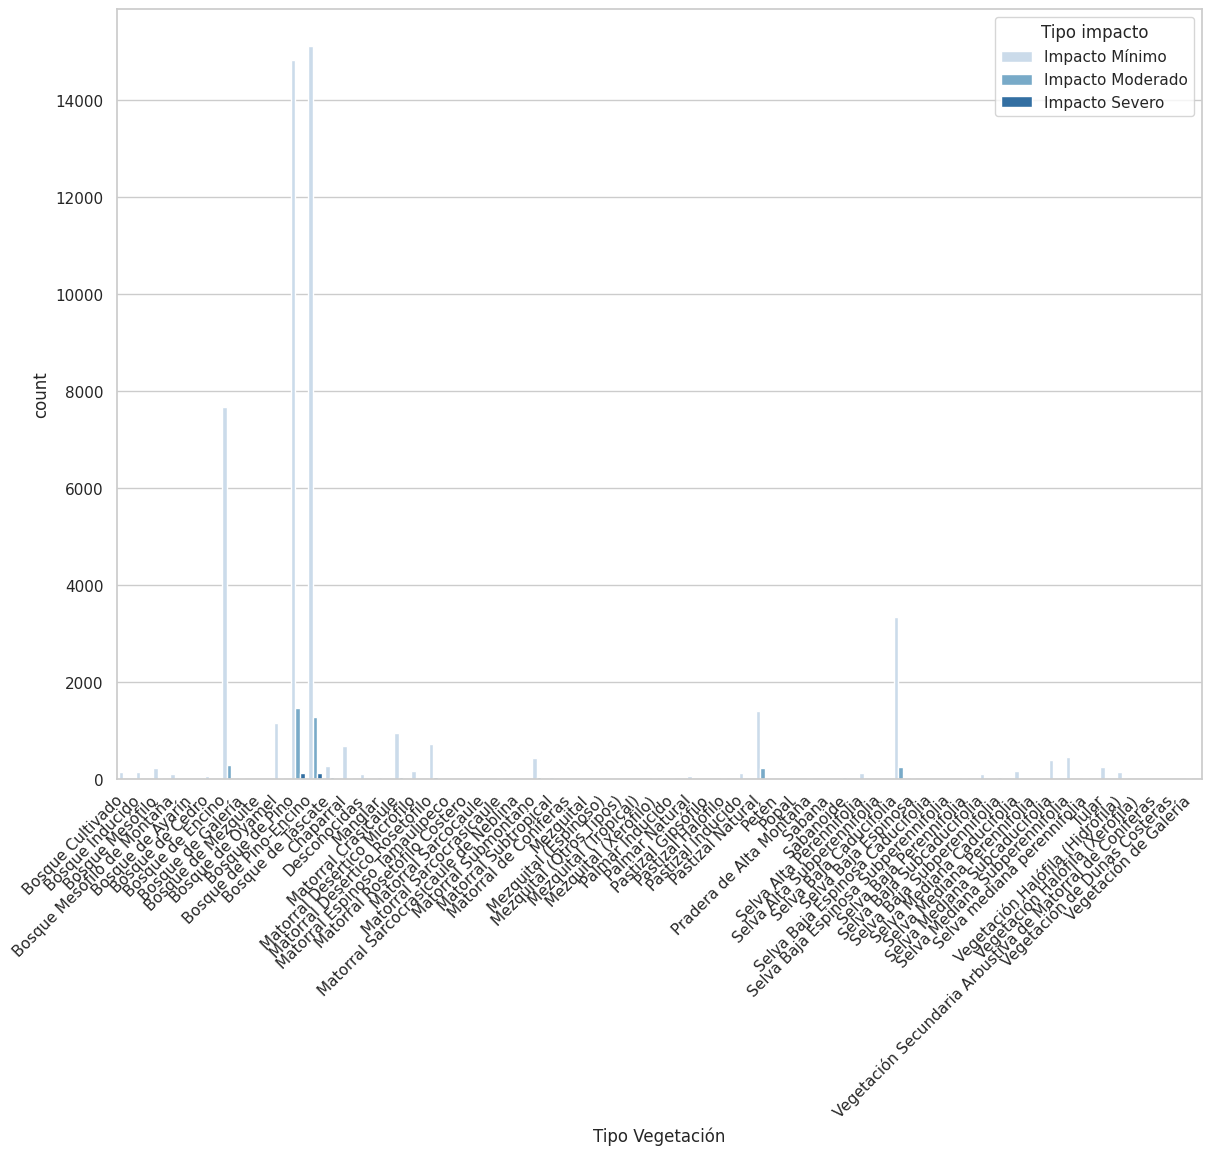

In [141]:
plt.figure(figsize=(14,10))
ax = sns.countplot(data=incendios,
              x='Tipo Vegetación',
              hue='Tipo impacto',
              palette='Blues',
              )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**Insights**
* La mayoría de los tipos de vegetación cuentan con mayor frecuencia de incendios con impacto mínimo, así que no podemos establecer que un tipo de vegetación específico tiene incidencia en el tipo de impacto.

**Visualizamos los datos geográficos**

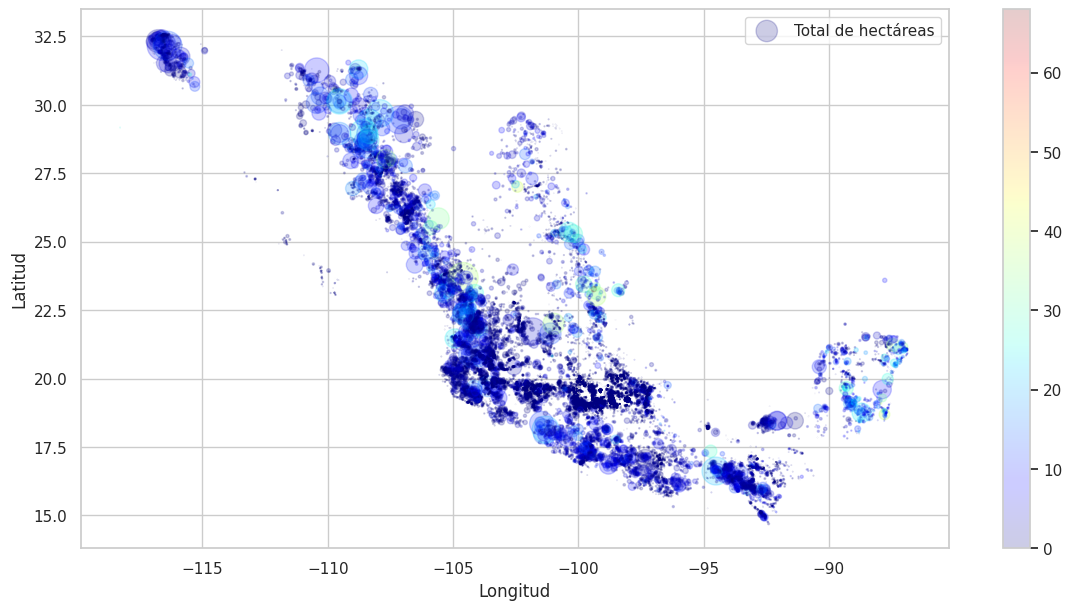

In [142]:
incendios.plot(kind='scatter',
               x='Longitud',
               y='Latitud',
               grid=True,
               alpha=0.2,
               s=incendios['Total hectáreas']/50,
               label='Total de hectáreas',
               c=incendios['Duración'].dt.days,
               cmap='jet',
               colorbar=True,
               legend=True,
               sharex=False,
               figsize=(14,7)
               )
plt.show()

**Insights**
* Las regiones que destacan por contar con mayor concentración de incencios son la Sierra Madre Occidental, Oriental, el eje Neovolcánico Transversal y las zonas de Tijuana.
* Existe una concentración de incendios que duran de 20 a 30 días aprox. y que afectan cantidades grandes de hectáreas en el norte de Sonora. Otra concentración de esta clase de incendios se observa en el estado de Quintana Roo.
* Incendios de gran magnitud: duración y zona de afectación altas se observan en la zona sur de Sinaloa casi limítrofe con Nayarit, en el bajío, en la huasteca potosína y en las zonas limítrofes de Nuevo León y Coahuila.

**Correlaciones**

In [149]:
incendios_con_duracion.corr()

,Año,Latitud,Longitud,Clave Entidad,Clave Municipio,Clave Geográfica,Arbolado Adulto,Renuevo,Arbustivo,Herbáceo,Hojarasca,Total hectáreas,Días,Segundos duración,Segundos detección,Segundos llegada
Año,1.000000,-0.007016,-0.022145,-0.028921,-0.020010,-0.029041,0.000656,0.034265,0.008486,0.016098,0.050274,0.041876,0.092726,0.095704,0.017411,0.051340
Latitud,-0.007016,1.000000,-0.802361,-0.255784,-0.293126,-0.257995,0.022653,0.026095,0.075254,0.085700,0.046234,0.090024,0.061774,0.065356,-0.025941,-0.018496
Longitud,-0.022145,-0.802361,1.000000,0.339806,0.233293,0.341203,0.004895,-0.004900,-0.051604,-0.050473,-0.058212,-0.065291,0.087744,0.083153,0.121509,0.067966
Clave Entidad,-0.028921,-0.255784,0.339806,1.000000,0.265166,0.999955,0.015808,-0.014213,-0.014111,-0.000762,-0.007760,-0.007109,0.023713,0.017329,0.008907,-0.006206
Clave Municipio,-0.020010,-0.293126,0.233293,0.265166,1.000000,0.274327,0.009863,0.002391,-0.010547,-0.007768,0.000551,-0.006452,-0.006429,-0.002149,0.010888,0.032855
Clave Geográfica,-0.029041,-0.257995,0.341203,0.999955,0.274327,1.000000,0.015863,-0.014151,-0.014177,-0.000837,-0.007734,-0.007154,0.023587,0.017262,0.008991,-0.005866
Arbolado Adulto,0.000656,0.022653,0.004895,0.015808,0.009863,0.015863,1.000000,0.248731,0.230183,0.240564,0.217978,0.359632,0.235962,0.232754,0.063375,0.053607
Renuevo,0.034265,0.026095,-0.004900,-0.014213,0.002391,-0.014151,0.248731,1.000000,0.226399,0.271038,0.273712,0.377662,0.281988,0.280043,0.066866,0.101485
Arbustivo,0.008486,0.075254,-0.051604,-0.014111,-0.010547,-0.014177,0.230183,0.226399,1.000000,0.464660,0.249204,0.700153,0.327718,0.326655,0.063202,0.064478
Herbáceo,0.016098,0.085700,-0.050473,-0.000762,-0.007768,-0.000837,0.240564,0.271038,0.464660,1.000000,0.426270,0.861795,0.344099,0.344805,0.050055,0.112140


In [147]:
#Realizamos transformación de los atributos de tiempo a segundos para poder compararlas con el resto de variables numéricas
incendios_con_duracion['Segundos duración'] = incendios['Duración'].dt.total_seconds()
incendios_con_duracion['Segundos detección'] = incendios['Detección'].dt.total_seconds()
incendios_con_duracion['Segundos llegada'] = incendios['Llegada'].dt.total_seconds()

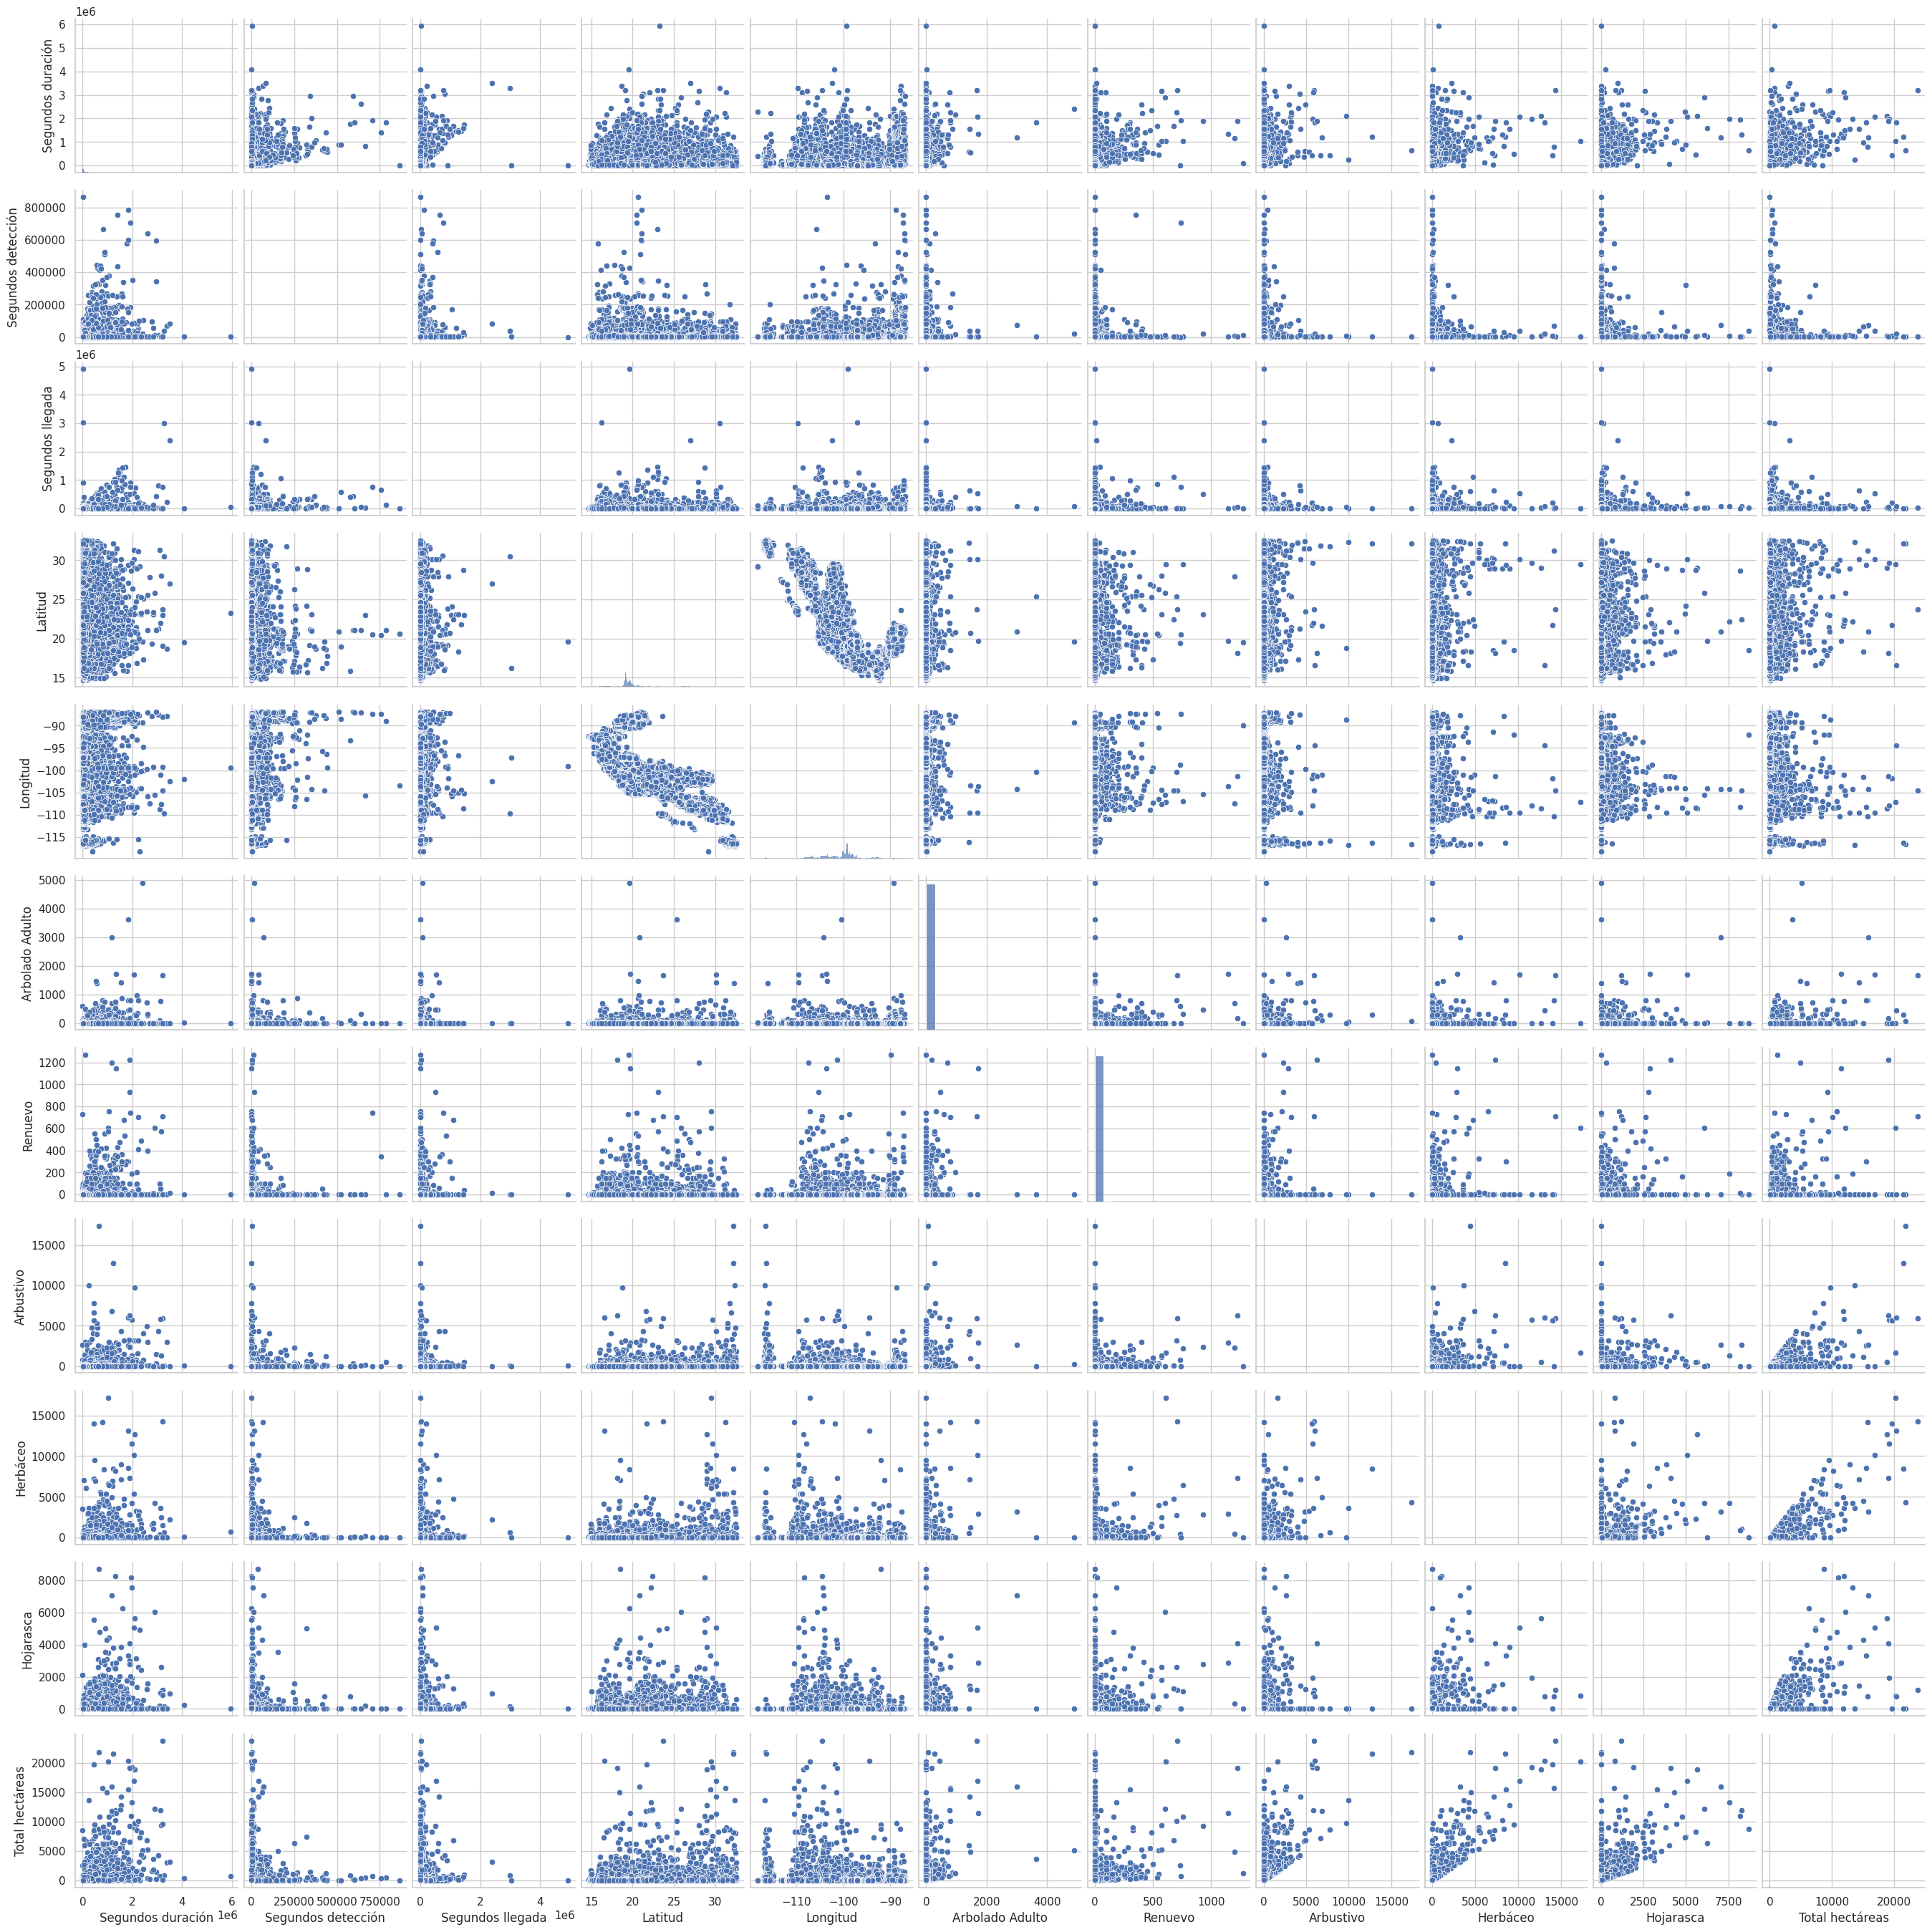

In [150]:
atributos = ['Segundos duración',
             'Segundos detección',
             'Segundos llegada',
             'Latitud', 'Longitud',
             'Arbolado Adulto', 'Renuevo', 'Arbustivo', 'Herbáceo','Hojarasca',
             'Total hectáreas']
sns.pairplot(data=incendios_con_duracion[atributos])

**Insights**
* Existe correlación entre las variables Arbolado Adulto, Renuevo, Hojarasca y Herbáceo con Total hectáreas como había de esperarse.
* No existe correlación entre los atributos de tiempo y cantidad de hectáreas afectadas, lo cual puede observarse en la parte inferior izquierda del grid.
* Tampoco existe una correlación entre las variables de Longitud, Latitud con el Total de hectáreas y tampoco con ninguno de los atributos de tiempo.

## **Conclusiones**

* Los incendios con un impacto severo tienen una media de días mayor que los de que son de impacto moderado y mínimo.
* Los incendios con impacto severo son aquellos que afectan la mayor cantidad de hectáreas en cualquier tipo de superficie.
* Las regiones que destacan por contar con mayor concentración de incencios son la Sierra Madre Occidental, Oriental, el eje Neovolcánico Transversal y las zonas de Tijuana y Chiapas.
* No existen correlaciones entre las variables de Longitud, Latitud con el Total de hectáreas y tampoco con ninguno de los atributos de tiempo.